## Project Notes - 1
### Capstone Project: Customer Churn E-Commerce

### Shubhadeep Bhattacharya
### PGP DSBA, Oct 2019 Batch <br>

#### importing the essential libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### reading the contents of the excel file into a dataframe, followed by a  quick review of the data:

In [2]:
data = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

In [3]:
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

<b>Note: </b>There are 20 features in the dataset, 15 of which are of datatype 'numeric' (int/float), and 5 of object datatype. <u>However, it can be noticed that a few categorical variables have been wrongly represented as numeric, and will have to be corrected.</u> <br>
There's also presence of a few <u>missing values</u> in the dataset, which will have to be addressed

In [5]:
data.shape

(5630, 20)

<u>Dataset Dimensions</u>: 5630 rows and 20 columns, representing records of 5630 customers using 20 features. 

In [6]:
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
data.isna().sum().sum()

1856

<b>Note: </b>There are <u>1856 missing values</u> in the dataset. These occur in 7 features/columns. 

In [8]:
data.duplicated().sum()

0

No duplicate records found in the dataset

In [9]:
data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


<b>Note: </b>5 categorical columns are featured as numeric: CustomerID, Churn, CityTier, SatisfactionScore and Complain. 

#### Hence, before proceeding with summary statistics, let us first correct the data types of those categorical variables that have a numeric data type.

In [10]:
data_dt = data.copy()

In [11]:
data_dt[['CustomerID', 'Churn', 'CityTier', 'SatisfactionScore', 'Complain']] = data_dt[['CustomerID', 'Churn', 'CityTier', 'SatisfactionScore', 'Complain']].astype('object')


In [12]:
data_dt.describe()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,10.189899,15.639896,2.931535,3.688988,4.214032,15.707922,1.751023,3.008004,4.543491,177.223030
std,8.557241,8.531475,0.721926,1.023999,2.583586,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,5.000000,0.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,9.000000,2.000000,3.000000,2.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,9.000000,14.000000,3.000000,4.000000,3.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,16.000000,20.000000,3.000000,4.000000,6.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,61.000000,127.000000,5.000000,6.000000,22.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [13]:
data_dt.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00
DaySinceLastOrder,5323.0,4.543491,3.654433,0.0,2.00,3.00,7.0000,46.00
CashbackAmount,5630.0,177.223030,49.207036,0.0,145.77,163.28,196.3925,324.99


In [14]:
data_dt.describe(include='object').T

,count,unique,top,freq
CustomerID,5630,5630,55630,1
Churn,5630,2,0,4682
PreferredLoginDevice,5630,3,Mobile Phone,2765
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
SatisfactionScore,5630,5,3,1698
MaritalStatus,5630,3,Married,2986
Complain,5630,2,0,4026


In [15]:
## list of numeric depenent variables
data_num = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder','CashbackAmount']

In [16]:
## list of categorical dependent variables (does not include CustomerID)
data_cat = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus', 'Complain']

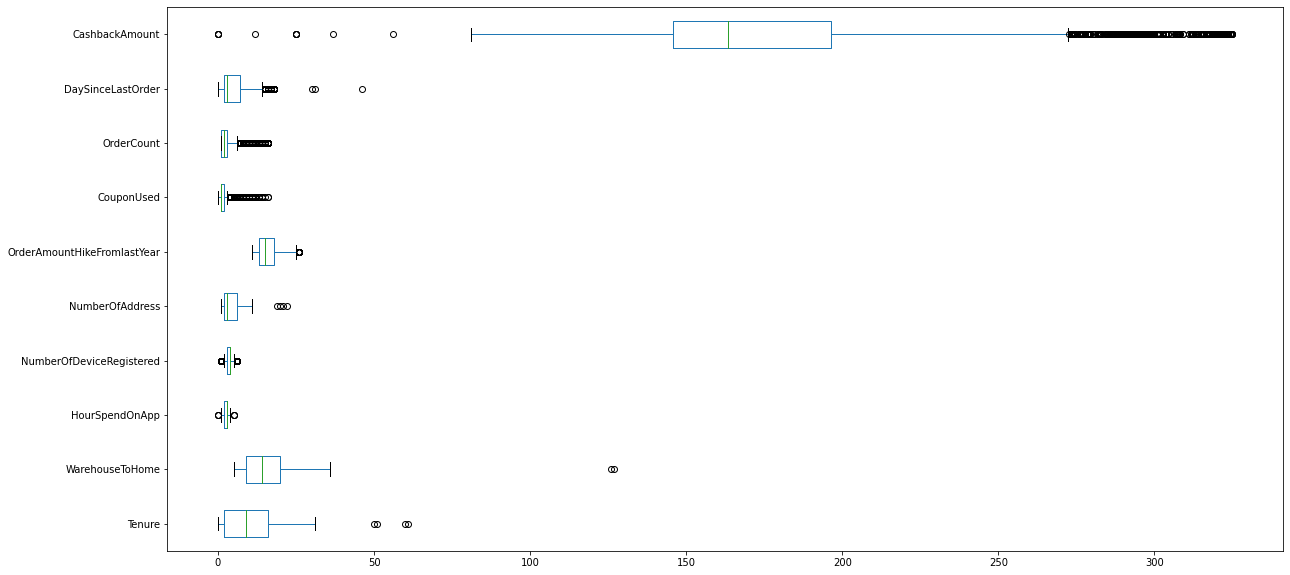

In [17]:
data_dt[data_num].plot(kind='box', vert=False, figsize=(20,10))

## EDA - UNIVARIATE

### We start with the Categorical Variables

#### CustomerID

In [20]:
data_dt.CustomerID.nunique()

5630

5630 unique customers in the dataset. 

In [21]:
data_dt['CustomerID'].describe()

count      5630
unique     5630
top       55630
freq          1
Name: CustomerID, dtype: int64

The CustomerID variable is a unique label assigned to each customer record. This feature will not be used in modeling, and will be dropped presently. 

#### Churn - the target variable

In [22]:
data_dt.Churn.value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [23]:
data_dt.Churn.value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

Around 17% of the customers fall in Churn category 1. This suggests an imbalance in the representation of customers who are likely to Churn, as a significant majority fall in Churn category 0. 

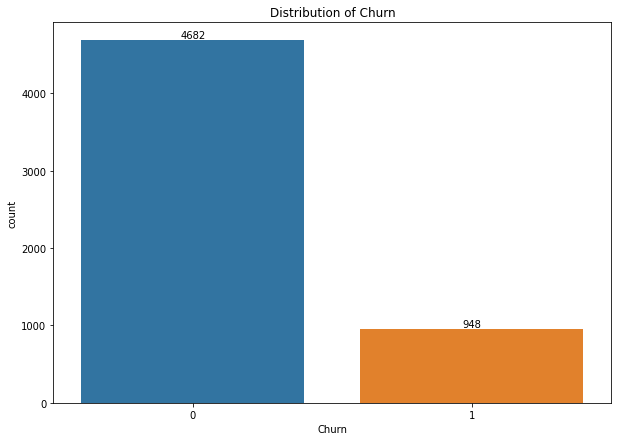

In [26]:
ax = plt.figure(figsize=(10,7))
ax = sns.countplot(data_dt.Churn)
ax.set(title='Distribution of Churn')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


In [27]:
## all variable transformations going forward will be made to a new dataset:
data_vt = data_dt.copy()

#### PreferredLoginDevice

In [28]:
data_dt.PreferredLoginDevice.value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

In [29]:
data_dt.PreferredLoginDevice.value_counts(normalize=True)

Mobile Phone    0.491119
Computer        0.290231
Phone           0.218650
Name: PreferredLoginDevice, dtype: float64

Mobile phone accounts for almost 50% of the share of preferred login devices. Together with Phone, 70% customers prefer to use their handheld devices to log in. 

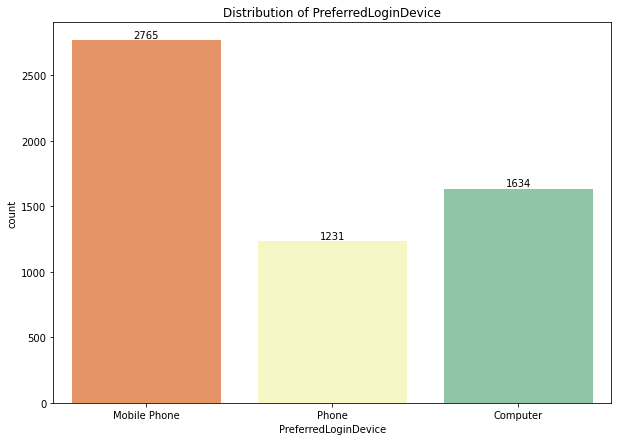

In [30]:
ax = plt.figure(figsize=(10,7))
ax = sns.countplot(data_dt.PreferredLoginDevice, palette='Spectral')
ax.set(title='Distribution of PreferredLoginDevice')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


#### We can assume categories Phone and Mobile Phone represent the same Category of Devices. Hence we will combine them into one category: Mobile Phone.

In [31]:
data_vt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   object 
 1   Churn                        5630 non-null   object 
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   object 
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [32]:
data_vt['PreferredLoginDevice'] = np.where(data_vt['PreferredLoginDevice']=='Phone', 'Mobile Phone', data_vt['PreferredLoginDevice'])

In [33]:
data_vt['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

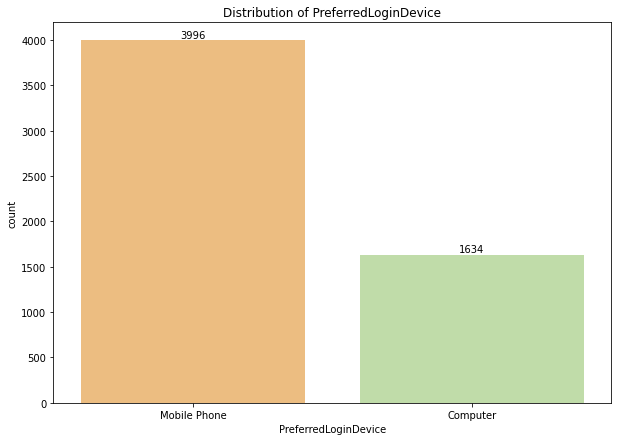

In [34]:
## plot after transformation
ax = plt.figure(figsize=(10,7))
ax = sns.countplot(data_vt.PreferredLoginDevice, palette='Spectral')
ax.set(title='Distribution of PreferredLoginDevice')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


#### CityTier

In [35]:
data_dt.CityTier.value_counts()

1    3666
3    1722
2     242
Name: CityTier, dtype: int64

In [36]:
data_dt.CityTier.value_counts(normalize=True)

1    0.651155
3    0.305861
2    0.042984
Name: CityTier, dtype: float64

Almost two-thirds (over 65%) of customers reside in Tier 1 cities. Tier 3 accounts for 30% of the customers. Less than 5% reside in Tier 2 cities.

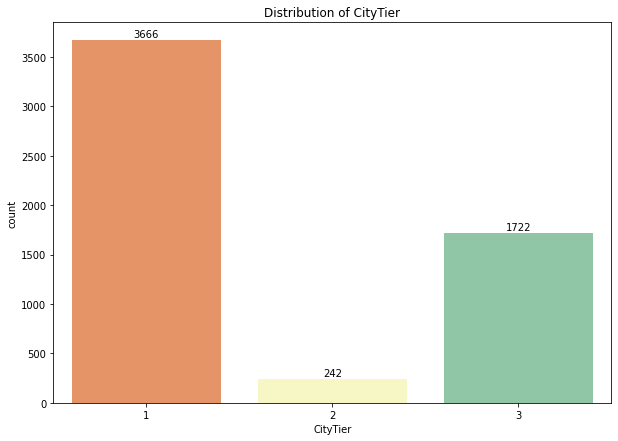

In [37]:
ax = plt.figure(figsize=(10,7))
ax = sns.countplot(data_dt.CityTier, palette='Spectral')
ax.set(title='Distribution of CityTier')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


#### PreferredPaymentMode

In [38]:
data_dt.PreferredPaymentMode.value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In [39]:
data_dt.PreferredPaymentMode.value_counts(normalize=True)

Debit Card          0.411012
Credit Card         0.266607
E wallet            0.109059
UPI                 0.073535
COD                 0.064831
CC                  0.048490
Cash on Delivery    0.026465
Name: PreferredPaymentMode, dtype: float64

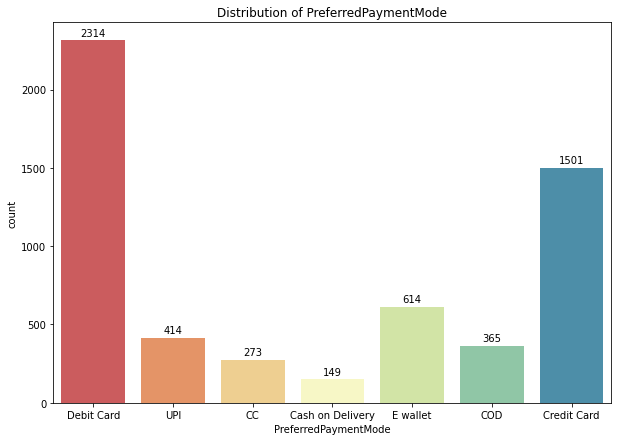

In [40]:
ax = plt.figure(figsize=(10,7))
ax = sns.countplot(data_dt.PreferredPaymentMode, palette='Spectral')
ax.set(title='Distribution of PreferredPaymentMode')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


Debit Card ranks as the favoured payment mode for over 41% of the customers. <br>However, we <u>note that certain categories are repeated under different names. CC is likely to be Credit Card. COD is likely to be Cash on Delivery. Hence, we consolidate the 2 categories.</u>

In [41]:
data_vt['PreferredPaymentMode'] = np.where(data_vt['PreferredPaymentMode']=='CC', 'Credit Card', data_vt['PreferredPaymentMode'])

In [42]:
data_vt['PreferredPaymentMode'] = np.where(data_vt['PreferredPaymentMode']=='COD', 'Cash on Delivery', data_vt['PreferredPaymentMode'])

In [43]:
data_vt['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [392]:
data_vt['PreferredPaymentMode'].value_counts(normalize=True)

Debit Card          0.411012
Credit Card         0.315098
E wallet            0.109059
Cash on Delivery    0.091297
UPI                 0.073535
Name: PreferredPaymentMode, dtype: float64

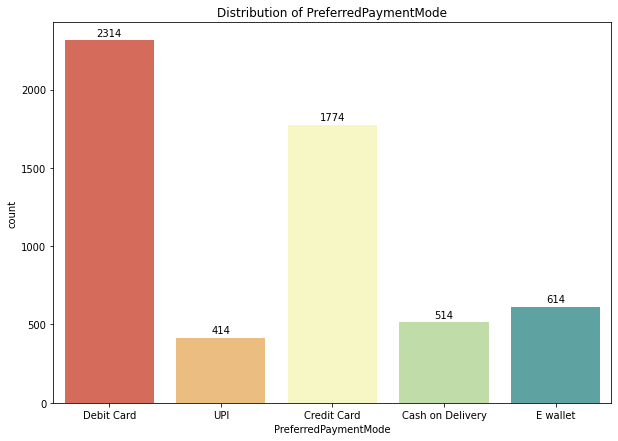

In [44]:
## plot after transformation

ax = plt.figure(figsize=(10,7))
ax = sns.countplot(data_vt.PreferredPaymentMode, palette='Spectral')
ax.set(title='Distribution of PreferredPaymentMode')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


#### Gender

In [45]:
data_dt.Gender.value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

In [46]:
data_dt.Gender.value_counts(normalize=True)

Male      0.601066
Female    0.398934
Name: Gender, dtype: float64

60% of the customers are Male, and 40% Female. 

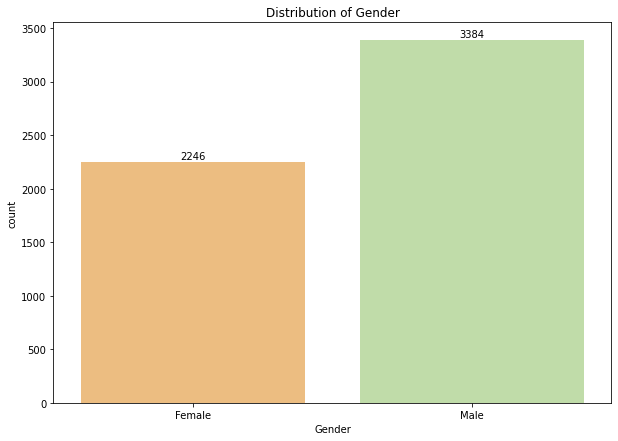

In [47]:
ax = plt.figure(figsize=(10,7))
ax = sns.countplot(data_vt.Gender, palette='Spectral')
ax.set(title='Distribution of Gender')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


#### PreferedOrderCat

In [48]:
data_dt.PreferedOrderCat.value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [49]:
data_dt.PreferedOrderCat.value_counts(normalize=True)

Laptop & Accessory    0.364121
Mobile Phone          0.225755
Fashion               0.146714
Mobile                0.143694
Grocery               0.072824
Others                0.046892
Name: PreferedOrderCat, dtype: float64

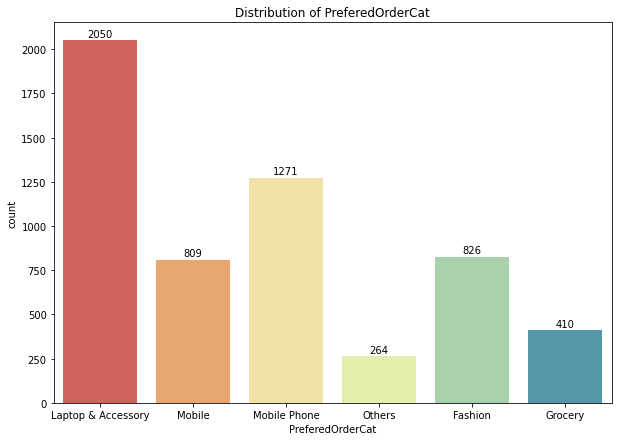

In [50]:
ax = plt.figure(figsize=(10,7))
ax = sns.countplot(data_dt.PreferedOrderCat, palette='Spectral')
ax.set(title='Distribution of PreferedOrderCat')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


Laptop and Accessories appear to be the highest ranked Preferred Order Category, with 36% of the customers. <br>
<u>We however note that Mobile and Mobile Phone appear as 2 categories, where it is likely the same category. Hence we consolidate the 2 categories into 'Mobile Phone.</u>

In [51]:
data_vt['PreferedOrderCat'] = np.where(data_vt['PreferedOrderCat']=='Mobile', 'Mobile Phone', data_vt['PreferedOrderCat'])

In [52]:
data_vt['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [393]:
data_vt['PreferedOrderCat'].value_counts(normalize=True)

Mobile Phone          0.369449
Laptop & Accessory    0.364121
Fashion               0.146714
Grocery               0.072824
Others                0.046892
Name: PreferedOrderCat, dtype: float64

With the transformation, Mobile Phone becomes the leading category, with Laptop & Accessories a very close second. 

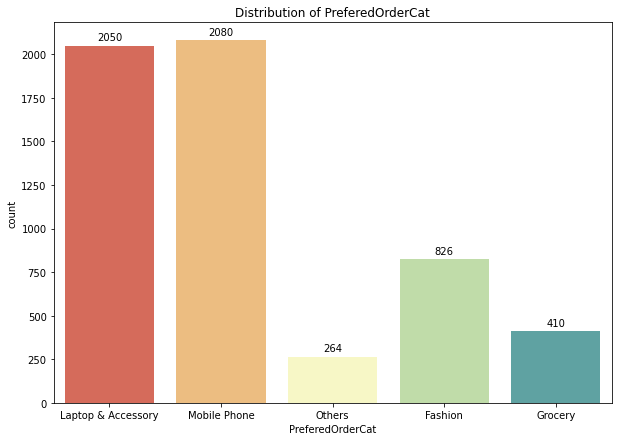

In [53]:
## plot after transformation

ax = plt.figure(figsize=(10,7))
ax = sns.countplot(data_vt.PreferedOrderCat, palette='Spectral')
ax.set(title='Distribution of PreferedOrderCat')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


#### SatisfactionScore

In [54]:
data_dt.SatisfactionScore.value_counts()

3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64

In [55]:
data_dt.SatisfactionScore.value_counts(normalize=True)

3    0.301599
1    0.206750
5    0.196803
4    0.190764
2    0.104085
Name: SatisfactionScore, dtype: float64

The rating of 3 or average is the largest category. 20% have given it a score of 1, the lowest score. 

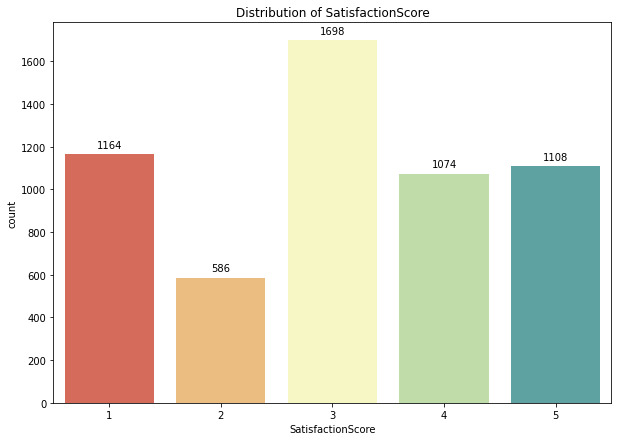

In [56]:
ax = plt.figure(figsize=(10,7))
ax = sns.countplot(data_dt.SatisfactionScore, palette='Spectral')
ax.set(title='Distribution of SatisfactionScore')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


#### MaritalStatus

In [57]:
data_dt.MaritalStatus.value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

In [58]:
data_dt.MaritalStatus.value_counts(normalize=True)

Married     0.530373
Single      0.319005
Divorced    0.150622
Name: MaritalStatus, dtype: float64

53% of the customers are married. And around 32% are single. 

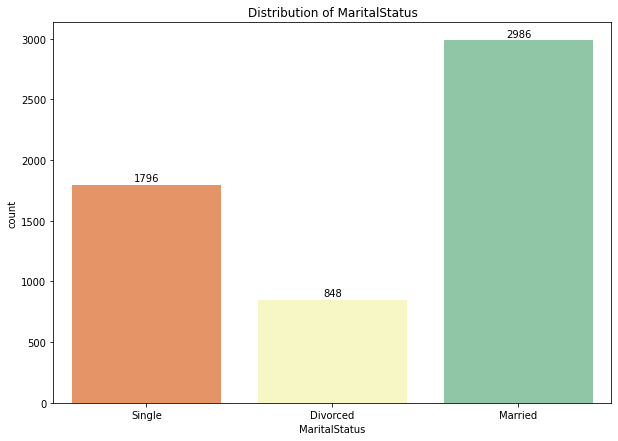

In [59]:
ax = plt.figure(figsize=(10,7))
ax = sns.countplot(data_dt.MaritalStatus, palette='Spectral')
ax.set(title='Distribution of MaritalStatus')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


#### Complain

In [60]:
data_dt.Complain.value_counts()

0    4026
1    1604
Name: Complain, dtype: int64

In [61]:
data_dt.Complain.value_counts(normalize=True)

0    0.715098
1    0.284902
Name: Complain, dtype: float64

Over 28% of the customers have raised a complaint in the last month. 

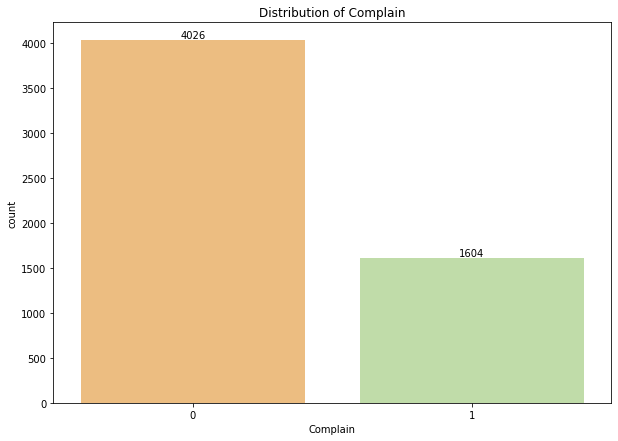

In [63]:
ax = plt.figure(figsize=(10,7))
ax = sns.countplot(data_dt.Complain, palette='Spectral')
ax.set(title='Distribution of Complain')

for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+30, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


### Numeric Variables

In [64]:
print(data_num)

['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


#### Tenure

In [65]:
data_dt.Tenure.describe()

count    5366.000000
mean       10.189899
std         8.557241
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64

In [66]:
## assumption: Tenure unit is months

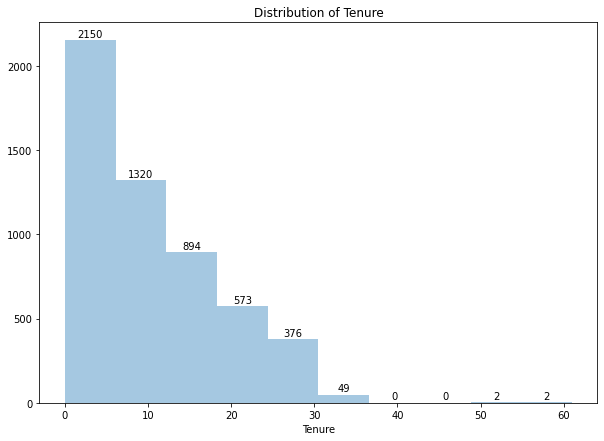

In [67]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['Tenure'], bins=10, kde=False)
ax.set(title="Distribution of Tenure")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



In [68]:
data_dt.Tenure.value_counts()

1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
60.0      1
61.0      1
50.0      1
51.0      1
Name: Tenure, dtype: int64

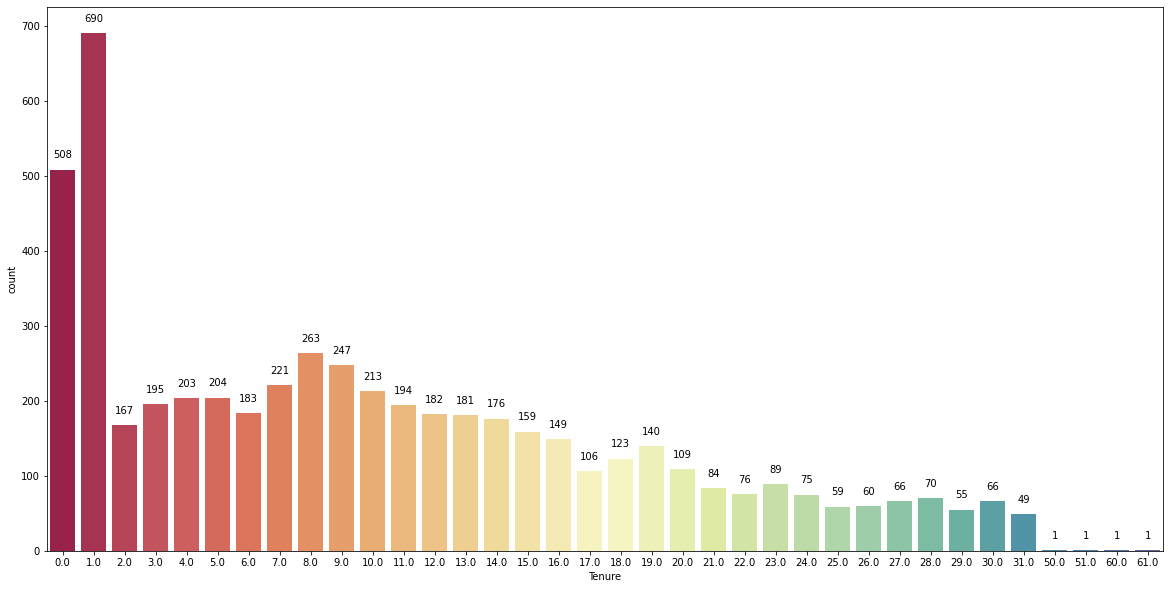

In [69]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data_dt.Tenure, palette='Spectral')
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+15, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



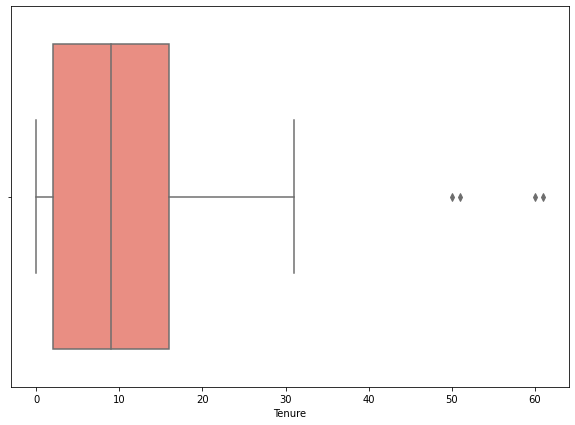

In [70]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.Tenure, color='Salmon')

We assume tenure is measured in months. Mean tenure is 10 months. Minimum is 0, which can imply these have joined less than 1 month ago. There are also some outlier values, exceeding 50 months.

#### WarehouseToHome

In [71]:
data_dt.WarehouseToHome.describe()

count    5379.000000
mean       15.639896
std         8.531475
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64

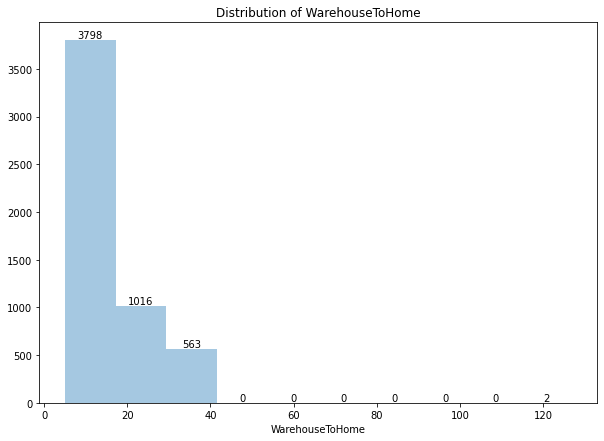

In [72]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['WarehouseToHome'], bins=10, kde=False)
ax.set(title="Distribution of WarehouseToHome")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



In [73]:
data_dt.WarehouseToHome.value_counts()

9.0      559
8.0      444
7.0      389
16.0     322
14.0     299
6.0      295
15.0     288
10.0     274
13.0     249
11.0     233
12.0     221
17.0     217
22.0     104
31.0     101
23.0      96
30.0      94
32.0      94
35.0      93
18.0      89
26.0      89
25.0      86
24.0      85
21.0      85
29.0      81
27.0      81
19.0      75
20.0      74
28.0      71
33.0      67
34.0      63
36.0      51
5.0        8
126.0      1
127.0      1
Name: WarehouseToHome, dtype: int64

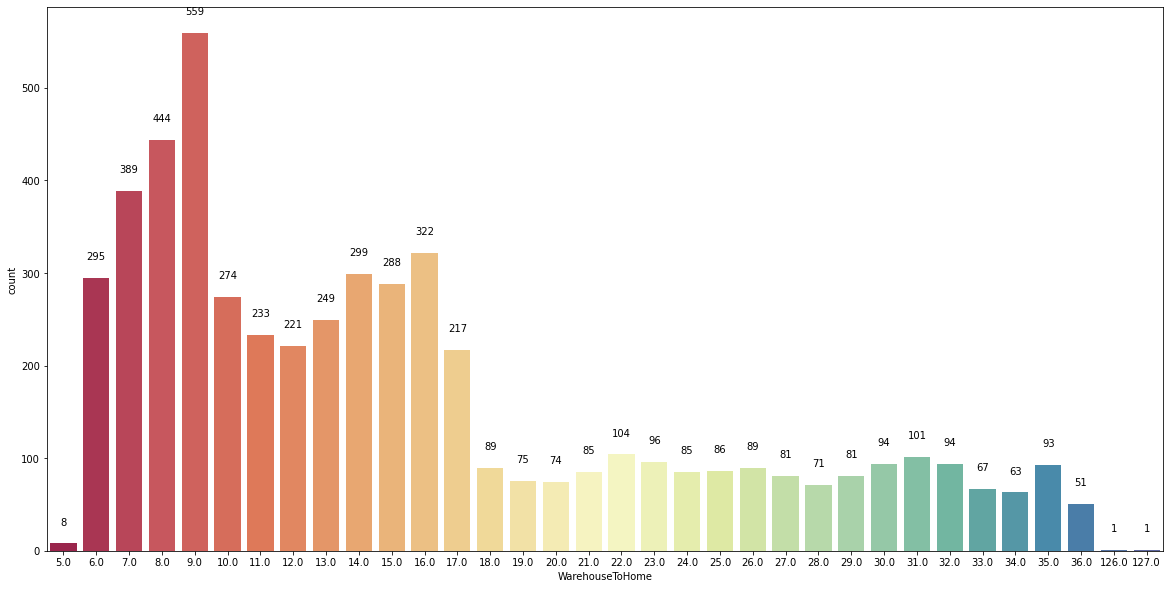

In [74]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data_dt.WarehouseToHome, palette='Spectral')
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



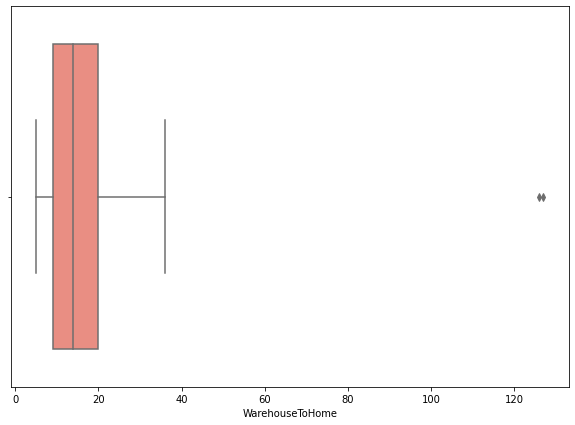

In [75]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.WarehouseToHome, color='Salmon')

<b>Note: </b>half the customers live within 14 km/miles from warehouse, and three-fourths of customers, less than or equal to 20. There is a couple of extreme values that live more than 120 units from the warehouse. 

In [76]:
data_dt[data_dt.WarehouseToHome>40]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1309,51310,0,25.0,Computer,3,126.0,Debit Card,Male,2.0,3,Mobile,1,Married,3,0,15.0,1.0,1.0,0.0,134.82
4124,54125,0,26.0,Computer,3,127.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,4,0,16.0,2.0,2.0,1.0,159.82


outliers present, 2 extreme values

#### HourSpendOnApp

In [77]:
data_dt.HourSpendOnApp.describe()

count    5375.000000
mean        2.931535
std         0.721926
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: HourSpendOnApp, dtype: float64

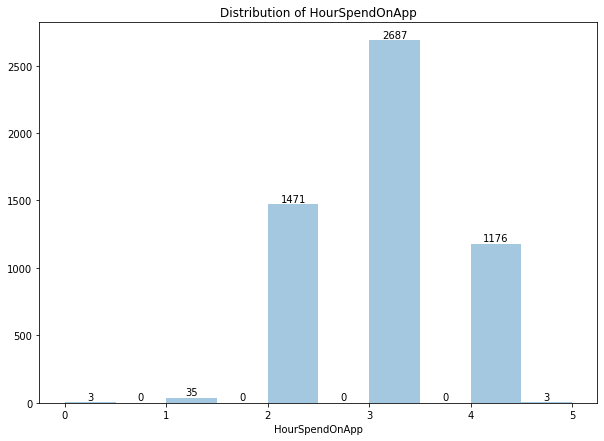

In [78]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['HourSpendOnApp'], bins=10, kde=False)
ax.set(title="Distribution of HourSpendOnApp")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


In [79]:
data_dt.HourSpendOnApp.value_counts()

3.0    2687
2.0    1471
4.0    1176
1.0      35
5.0       3
0.0       3
Name: HourSpendOnApp, dtype: int64

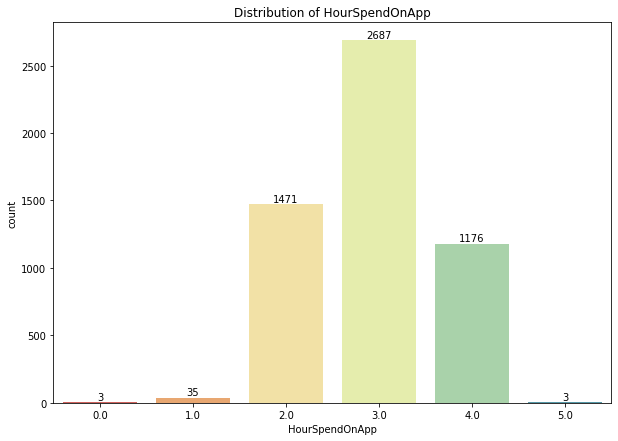

In [396]:
plt.figure(figsize = (10,7))
ax = sns.countplot(data_dt.HourSpendOnApp, palette='Spectral')
ax.set(title="Distribution of HourSpendOnApp")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


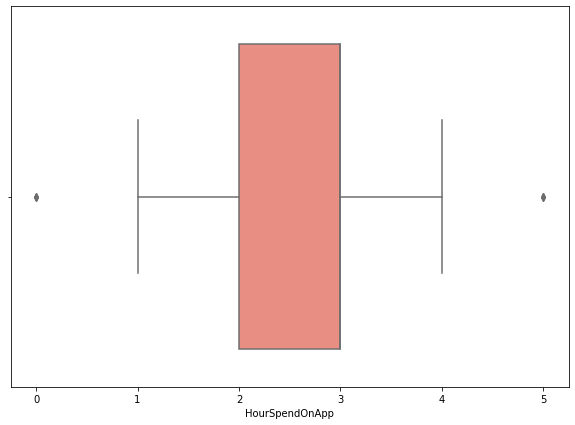

In [81]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.HourSpendOnApp, color='Salmon')

In [82]:
data_dt[data_dt.HourSpendOnApp==0]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
150,50151,0,10.0,Computer,1,6.0,Credit Card,Female,0.0,3,Fashion,2,Married,3,1,18.0,0.0,NaN,2.0,236.03
950,50951,0,5.0,Mobile Phone,1,16.0,Credit Card,Male,0.0,3,Fashion,1,Single,3,0,25.0,0.0,1.0,NaN,212.44
1950,51951,0,11.0,Computer,1,18.0,Debit Card,Male,0.0,4,Laptop & Accessory,5,Married,3,0,15.0,1.0,1.0,2.0,162.88


In [83]:
data_dt[data_dt.HourSpendOnApp==5]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4223,54224,0,31.0,Mobile Phone,3,32.0,Debit Card,Female,5.0,4,Fashion,5,Single,9,0,12.0,7.0,8.0,10.0,201.37
4248,54249,0,4.0,Mobile Phone,1,9.0,Debit Card,Male,5.0,5,Laptop & Accessory,1,Married,3,0,20.0,4.0,11.0,9.0,166.52
4351,54352,0,1.0,Phone,1,16.0,Credit Card,Female,5.0,4,Mobile Phone,4,Single,3,0,17.0,1.0,2.0,4.0,147.79


Assume: 0 hours indicates less than 1 hour

#### NumberOfDeviceRegistered

In [84]:
data_dt.NumberOfDeviceRegistered.describe()

count    5630.000000
mean        3.688988
std         1.023999
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: NumberOfDeviceRegistered, dtype: float64

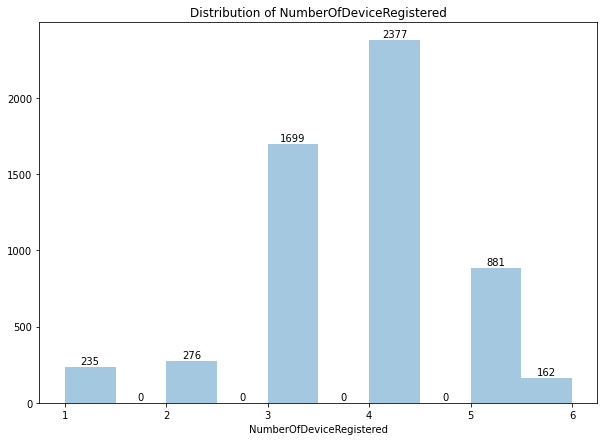

In [85]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['NumberOfDeviceRegistered'], bins=10, kde=False)
ax.set(title="Distribution of NumberOfDeviceRegistered")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



In [86]:
data_dt.NumberOfDeviceRegistered.value_counts()

4    2377
3    1699
5     881
2     276
1     235
6     162
Name: NumberOfDeviceRegistered, dtype: int64

In [87]:
data_dt.NumberOfDeviceRegistered.value_counts(normalize=True)

4    0.422202
3    0.301776
5    0.156483
2    0.049023
1    0.041741
6    0.028774
Name: NumberOfDeviceRegistered, dtype: float64

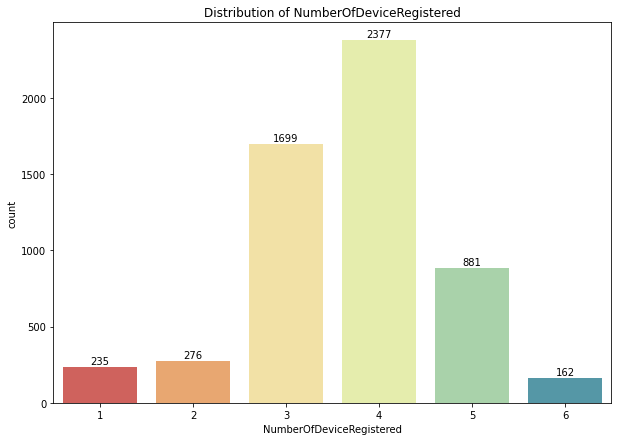

In [397]:
plt.figure(figsize = (10,7))
ax = sns.countplot(data_dt.NumberOfDeviceRegistered, palette='Spectral')
ax.set(title="Distribution of NumberOfDeviceRegistered")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


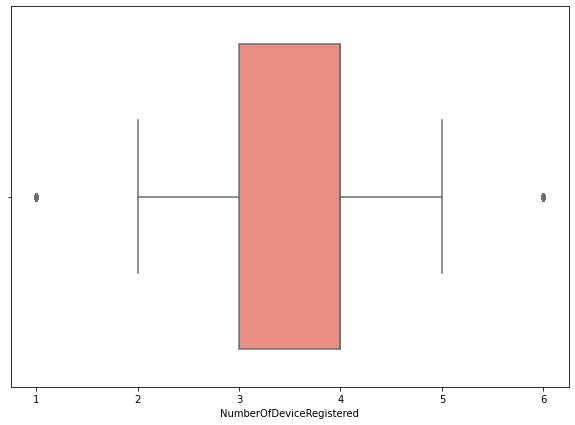

In [89]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.NumberOfDeviceRegistered, color='Salmon')

over 70% of customers have 3 or 4 devices registered, 42% highest having 4

#### NumberOfAddress

In [90]:
data_dt.NumberOfAddress.describe()

count    5630.000000
mean        4.214032
std         2.583586
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        22.000000
Name: NumberOfAddress, dtype: float64

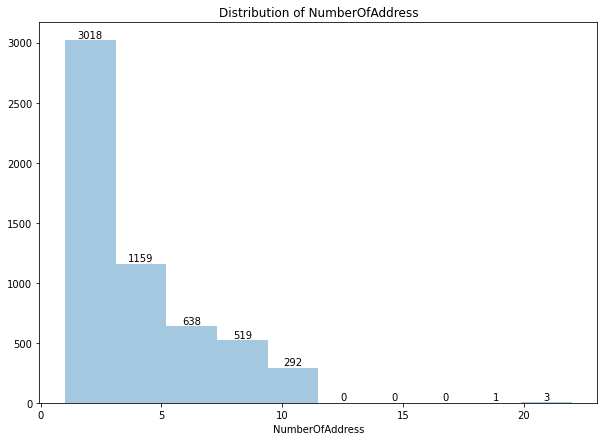

In [91]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['NumberOfAddress'], bins=10, kde=False)
ax.set(title="Distribution of NumberOfAddress")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



In [92]:
data_dt.NumberOfAddress.value_counts()

2     1369
3     1278
4      588
5      571
6      382
1      371
8      280
7      256
9      239
10     194
11      98
19       1
22       1
21       1
20       1
Name: NumberOfAddress, dtype: int64

In [93]:
data_dt.NumberOfAddress.value_counts(normalize=True)

2     0.243162
3     0.226998
4     0.104440
5     0.101421
6     0.067851
1     0.065897
8     0.049734
7     0.045471
9     0.042451
10    0.034458
11    0.017407
19    0.000178
22    0.000178
21    0.000178
20    0.000178
Name: NumberOfAddress, dtype: float64

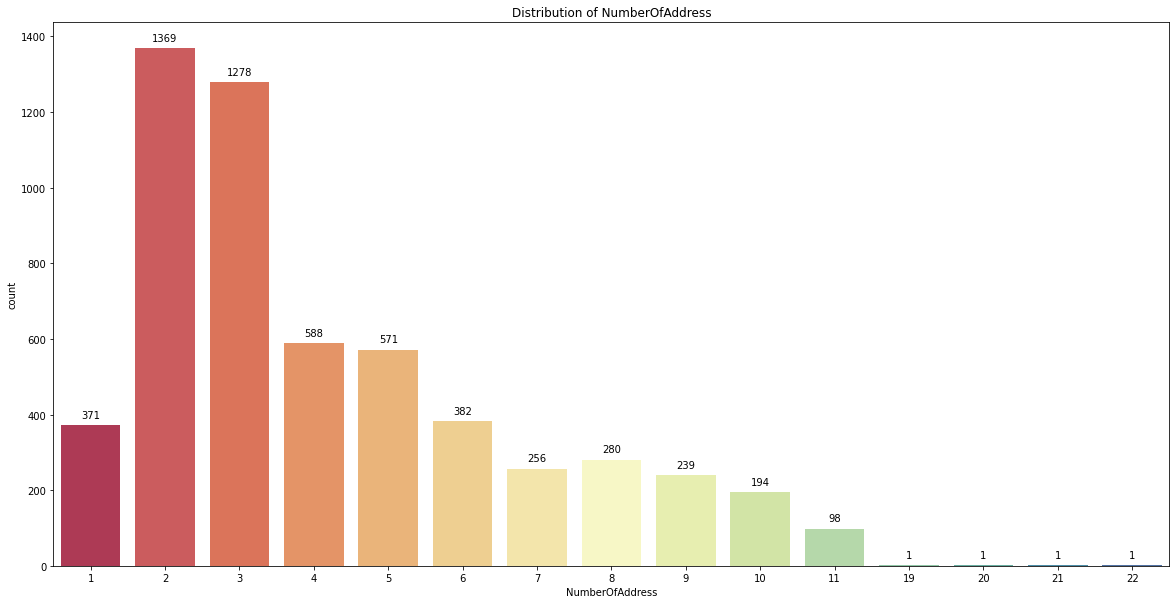

In [94]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data_dt.NumberOfAddress, palette='Spectral')
ax.set(title="Distribution of NumberOfAddress")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


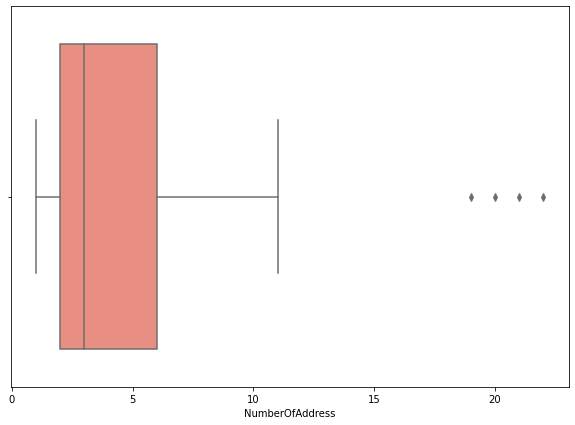

In [95]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.NumberOfAddress, color='Salmon')

Note: Presence of extreme values (greater than 18), and also a significant number with 5 or more addresses

#### OrderAmountHikeFromlastYear

In [96]:
data_dt.OrderAmountHikeFromlastYear.describe()

count    5365.000000
mean       15.707922
std         3.675485
min        11.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        26.000000
Name: OrderAmountHikeFromlastYear, dtype: float64

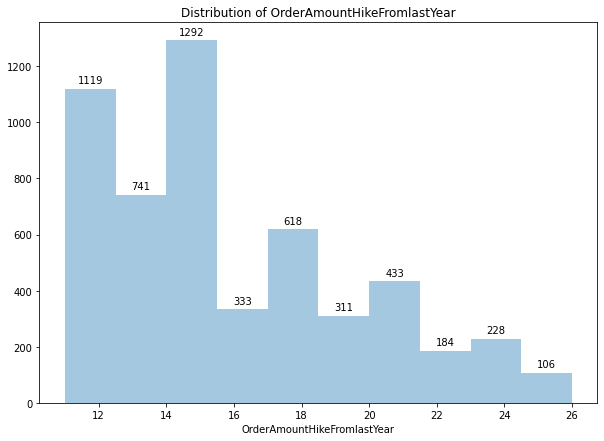

In [97]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['OrderAmountHikeFromlastYear'], bins=10, kde=False)
ax.set(title="Distribution of OrderAmountHikeFromlastYear")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



In [98]:
data_dt.OrderAmountHikeFromlastYear.value_counts()

14.0    750
13.0    741
12.0    728
15.0    542
11.0    391
16.0    333
18.0    321
19.0    311
17.0    297
20.0    243
21.0    190
22.0    184
23.0    144
24.0     84
25.0     73
26.0     33
Name: OrderAmountHikeFromlastYear, dtype: int64

In [99]:
data_dt.OrderAmountHikeFromlastYear.value_counts(normalize=True)

14.0    0.139795
13.0    0.138117
12.0    0.135694
15.0    0.101025
11.0    0.072880
16.0    0.062069
18.0    0.059832
19.0    0.057968
17.0    0.055359
20.0    0.045294
21.0    0.035415
22.0    0.034296
23.0    0.026841
24.0    0.015657
25.0    0.013607
26.0    0.006151
Name: OrderAmountHikeFromlastYear, dtype: float64

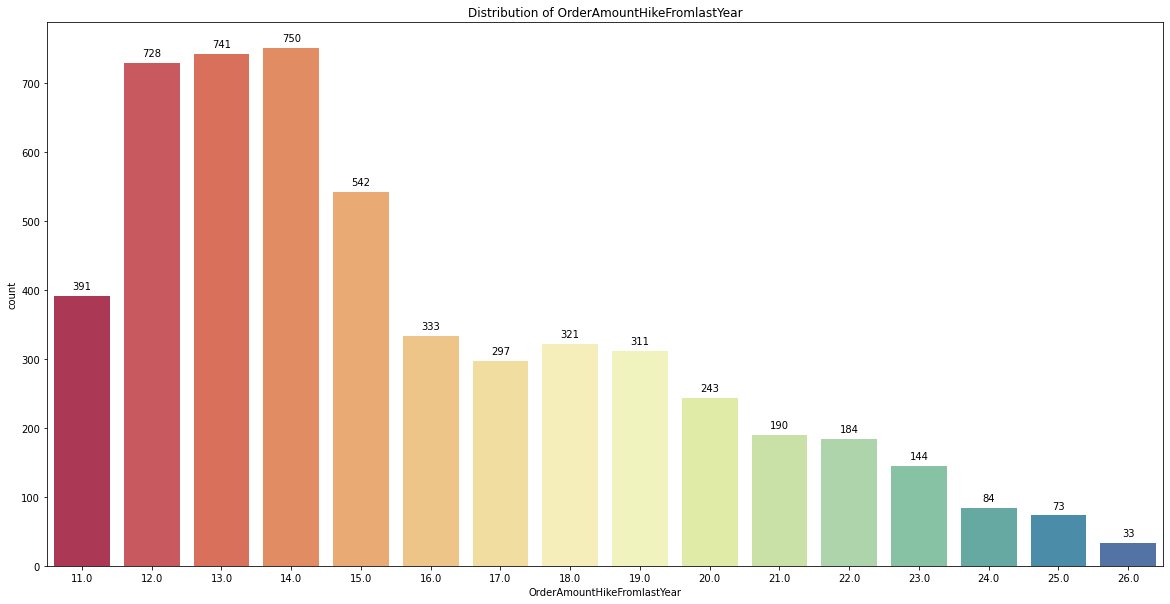

In [100]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data_dt.OrderAmountHikeFromlastYear, palette='Spectral')
ax.set(title="Distribution of OrderAmountHikeFromlastYear")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+10, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


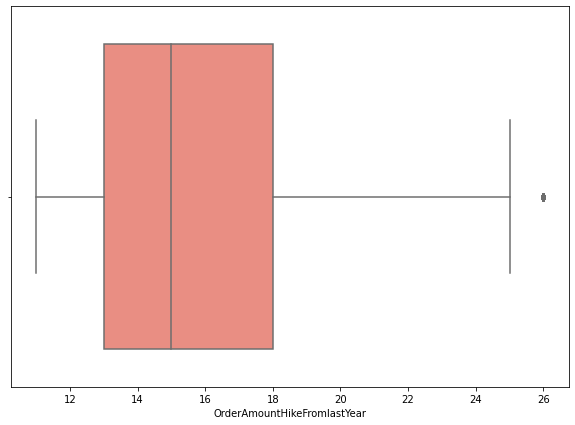

In [101]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.OrderAmountHikeFromlastYear, color='Salmon')

Trying to make sense of the OrderAmountHikeFromLastYear column - all positive values, indicating that all customers in the dataset have bought more since last year. Some customers, based on Tenure, have not evem been on the records for a year. 

In [103]:
data_dt.OrderAmountHikeFromlastYear.isnull().sum()

265

In [104]:
data_dt[data_dt.OrderAmountHikeFromlastYear.isnull()]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
10,50011,1,4.0,Mobile Phone,1,18.0,Cash on Delivery,Female,2.0,3,Others,3,Divorced,2,0,NaN,9.0,15.0,8.0,295.45
40,50041,0,23.0,Mobile Phone,1,17.0,Debit Card,Female,2.0,3,Others,4,Single,4,0,NaN,2.0,4.0,4.0,299.26
65,50066,0,25.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Others,3,Divorced,1,0,NaN,1.0,11.0,9.0,299.99
106,50107,0,15.0,Mobile Phone,1,10.0,Cash on Delivery,Male,2.0,3,Others,2,Divorced,2,0,NaN,0.0,11.0,15.0,292.32
108,50109,0,23.0,Mobile Phone,3,6.0,Credit Card,Female,3.0,3,Others,2,Married,4,0,NaN,1.0,1.0,6.0,295.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5534,55535,0,61.0,Mobile Phone,3,28.0,Debit Card,Female,4.0,4,Grocery,1,Married,6,1,NaN,1.0,2.0,1.0,303.75
5537,55538,0,23.0,Computer,1,9.0,Debit Card,Male,3.0,4,Others,1,Married,5,0,NaN,5.0,5.0,4.0,316.61
5561,55562,0,29.0,Mobile Phone,2,33.0,UPI,Male,4.0,2,Others,4,Married,6,1,NaN,2.0,2.0,5.0,321.36
5597,55598,0,13.0,Computer,1,16.0,Debit Card,Male,3.0,4,Others,1,Single,4,0,NaN,2.0,2.0,4.0,319.31


Note: Null values are distributed, and don't comform to any pattern

In [105]:
data_dt.Tenure.value_counts()

1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
60.0      1
61.0      1
50.0      1
51.0      1
Name: Tenure, dtype: int64

In [106]:
data_dt.Tenure[data.Tenure<12].count()

3288

Observation: all a positive amount?? min hike 11%??

There are 3288 customers with less than 12 month Tenure. And at least 500 customers with 0 tenure - how is it that all customers have a positive order amount hike from last year?

Assumption: This is a computed variable by business, and hence is taken at face value. 

#### CouponUsed

In [108]:
data_dt.CouponUsed.describe()

count    5374.000000
mean        1.751023
std         1.894621
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: CouponUsed, dtype: float64

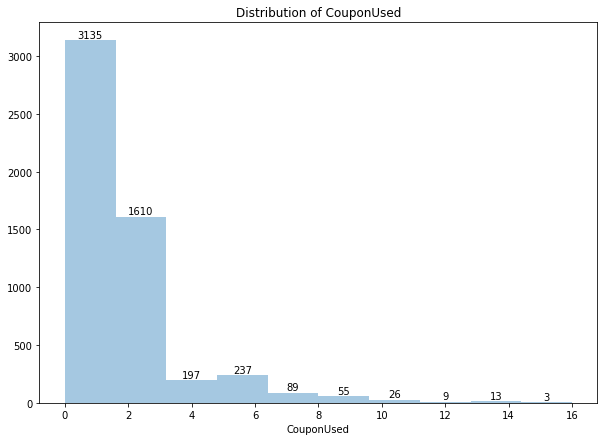

In [109]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['CouponUsed'], bins=10, kde=False)
ax.set(title="Distribution of CouponUsed")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


In [110]:
data_dt.CouponUsed.value_counts()

1.0     2105
2.0     1283
0.0     1030
3.0      327
4.0      197
5.0      129
6.0      108
7.0       89
8.0       42
10.0      14
9.0       13
11.0      12
12.0       9
13.0       8
14.0       5
16.0       2
15.0       1
Name: CouponUsed, dtype: int64

In [111]:
data_dt.CouponUsed.value_counts(normalize=True)

1.0     0.391701
2.0     0.238742
0.0     0.191664
3.0     0.060849
4.0     0.036658
5.0     0.024004
6.0     0.020097
7.0     0.016561
8.0     0.007815
10.0    0.002605
9.0     0.002419
11.0    0.002233
12.0    0.001675
13.0    0.001489
14.0    0.000930
16.0    0.000372
15.0    0.000186
Name: CouponUsed, dtype: float64

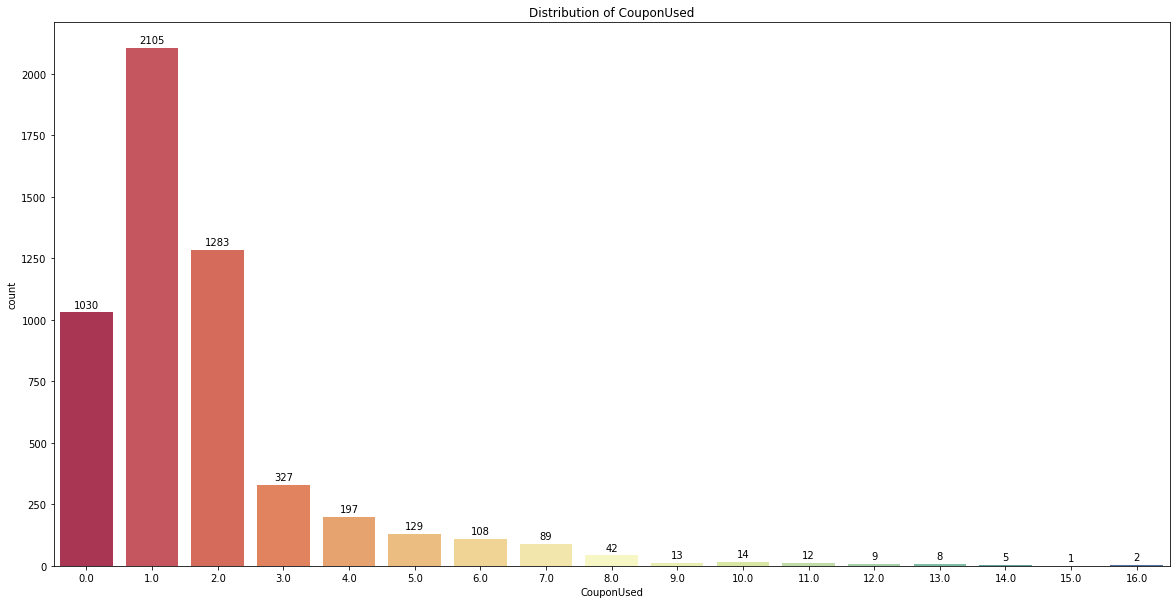

In [112]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data_dt.CouponUsed, palette='Spectral')
ax.set(title="Distribution of CouponUsed")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



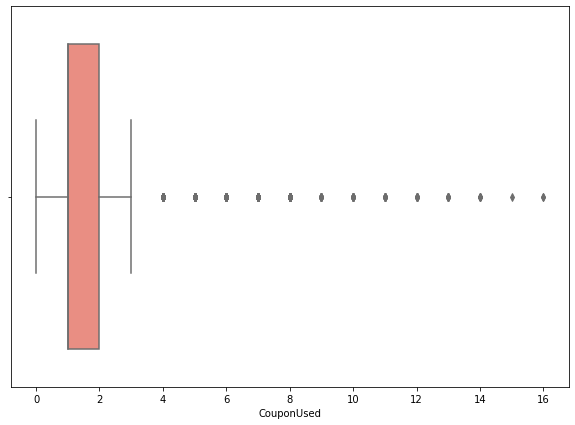

In [113]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.CouponUsed, color='Salmon')

Outliers indicate a possible class of heavy coupon users

#### OrderCount

In [114]:
data_dt.OrderCount.describe()

count    5372.000000
mean        3.008004
std         2.939680
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: OrderCount, dtype: float64

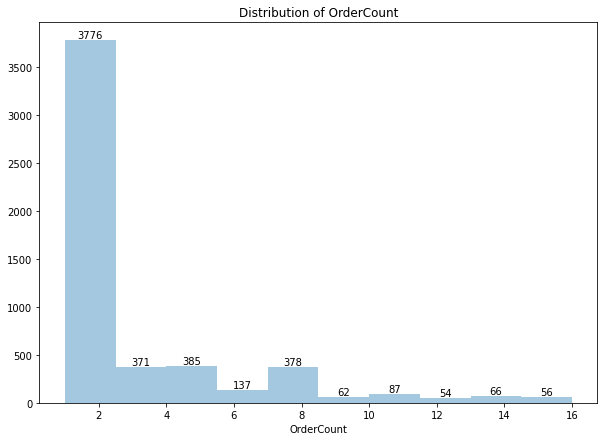

In [115]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['OrderCount'], bins=10, kde=False)
ax.set(title="Distribution of OrderCount")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



In [116]:
data_dt.OrderCount.value_counts()

2.0     2025
1.0     1751
3.0      371
7.0      206
4.0      204
5.0      181
8.0      172
6.0      137
9.0       62
12.0      54
11.0      51
14.0      36
10.0      36
15.0      33
13.0      30
16.0      23
Name: OrderCount, dtype: int64

In [117]:
data_dt.OrderCount.value_counts(normalize=True)

2.0     0.376955
1.0     0.325949
3.0     0.069062
7.0     0.038347
4.0     0.037975
5.0     0.033693
8.0     0.032018
6.0     0.025503
9.0     0.011541
12.0    0.010052
11.0    0.009494
14.0    0.006701
10.0    0.006701
15.0    0.006143
13.0    0.005585
16.0    0.004281
Name: OrderCount, dtype: float64

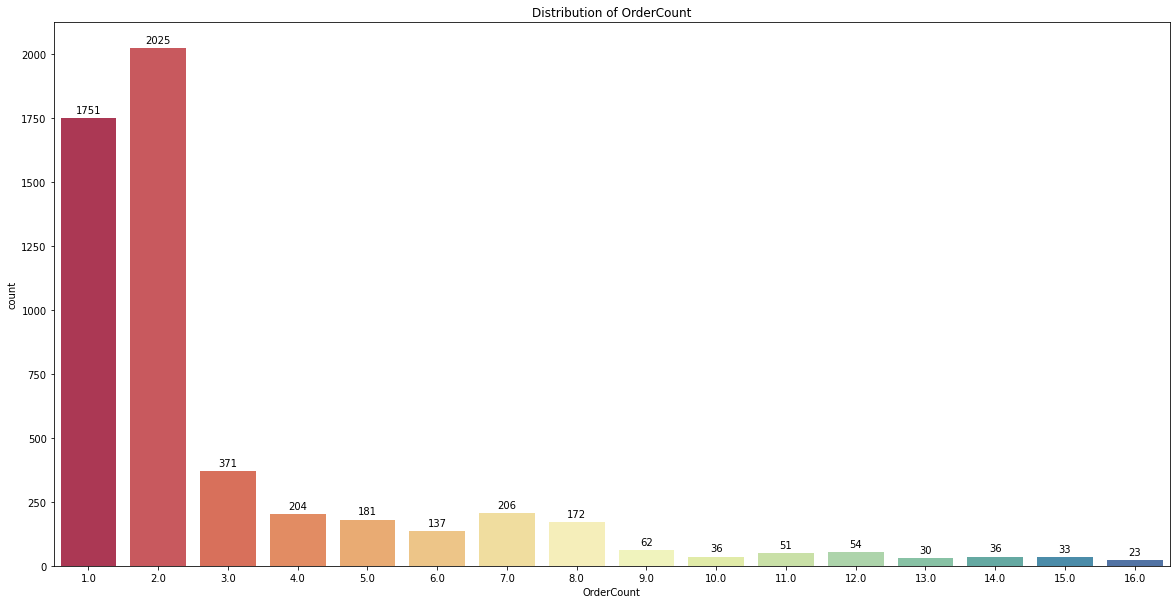

In [118]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data_dt.OrderCount, palette='Spectral')
ax.set(title="Distribution of OrderCount")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


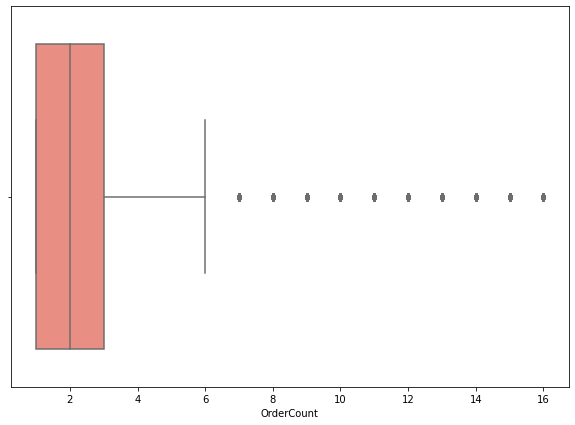

In [119]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.OrderCount, color='Salmon')

most have placed 2 orders, 70% either 1 or 2. 

#### Observation: every customer in the dataset has placed at least 1 order last month

In [120]:
data_dt.OrderCount.isnull().sum()

258

In [121]:
data_dt[data_dt.OrderCount.isnull()]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
64,50065,0,24.0,Mobile Phone,1,9.0,Credit Card,Female,3.0,3,Grocery,4,Single,4,0,18.0,0.0,NaN,0.0,237.34
90,50091,0,14.0,Mobile Phone,3,12.0,Debit Card,Female,3.0,3,Fashion,2,Single,4,1,18.0,0.0,NaN,0.0,235.91
110,50111,0,16.0,Mobile Phone,3,22.0,E wallet,Female,3.0,3,Grocery,2,Divorced,6,1,22.0,0.0,NaN,9.0,260.64
120,50121,0,4.0,Computer,1,9.0,Credit Card,Male,3.0,3,Fashion,3,Married,10,0,12.0,1.0,NaN,2.0,236.75
143,50144,0,18.0,Mobile Phone,1,26.0,Credit Card,Male,3.0,3,Grocery,2,Divorced,1,1,14.0,0.0,NaN,10.0,234.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,55566,0,5.0,Computer,1,17.0,Credit Card,Female,3.0,4,Fashion,3,Married,6,0,21.0,4.0,NaN,9.0,235.31
5581,55582,0,21.0,Computer,1,8.0,Credit Card,Female,4.0,4,Fashion,4,Married,2,0,19.0,1.0,NaN,13.0,244.57
5590,55591,0,12.0,Mobile Phone,1,17.0,Credit Card,Female,4.0,6,Fashion,3,Married,5,0,13.0,1.0,NaN,12.0,257.06
5621,55622,1,14.0,Mobile Phone,3,35.0,E wallet,Male,3.0,5,Fashion,5,Married,6,1,14.0,3.0,NaN,1.0,233.54


No pattern as such among NaN 

#### DaySinceLastOrder

In [122]:
data_dt.DaySinceLastOrder.describe()

count    5323.000000
mean        4.543491
std         3.654433
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64

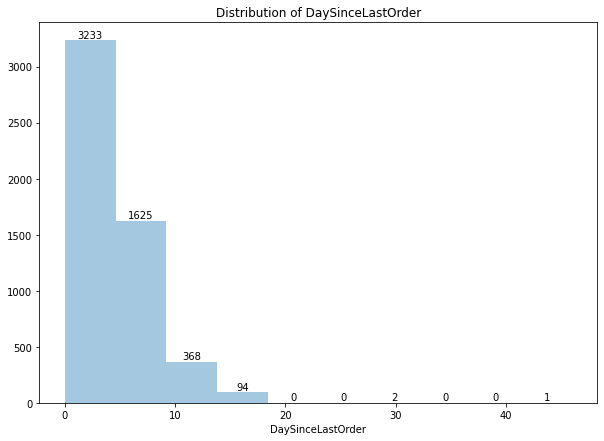

In [123]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['DaySinceLastOrder'], bins=10, kde=False)
ax.set(title="Distribution of DaySinceLastOrder")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



In [124]:
data_dt.DaySinceLastOrder.value_counts()

3.0     900
2.0     792
1.0     614
8.0     538
0.0     496
7.0     447
4.0     431
9.0     299
5.0     228
10.0    157
6.0     113
11.0     91
12.0     69
13.0     51
14.0     35
15.0     19
17.0     17
16.0     13
18.0     10
46.0      1
30.0      1
31.0      1
Name: DaySinceLastOrder, dtype: int64

In [125]:
data_dt.DaySinceLastOrder.value_counts(normalize=True)

3.0     0.169078
2.0     0.148788
1.0     0.115348
8.0     0.101071
0.0     0.093181
7.0     0.083975
4.0     0.080969
9.0     0.056171
5.0     0.042833
10.0    0.029495
6.0     0.021229
11.0    0.017096
12.0    0.012963
13.0    0.009581
14.0    0.006575
15.0    0.003569
17.0    0.003194
16.0    0.002442
18.0    0.001879
46.0    0.000188
30.0    0.000188
31.0    0.000188
Name: DaySinceLastOrder, dtype: float64

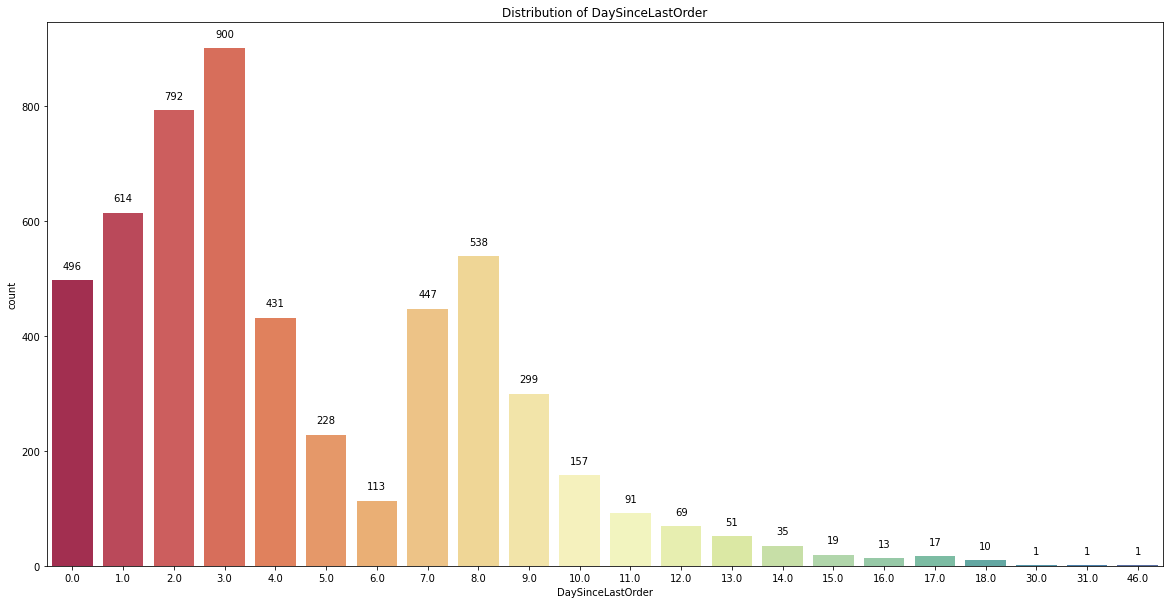

In [126]:
plt.figure(figsize = (20,10))
ax = sns.countplot(data_dt.DaySinceLastOrder, palette='Spectral')
ax.set(title="Distribution of DaySinceLastOrder")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center



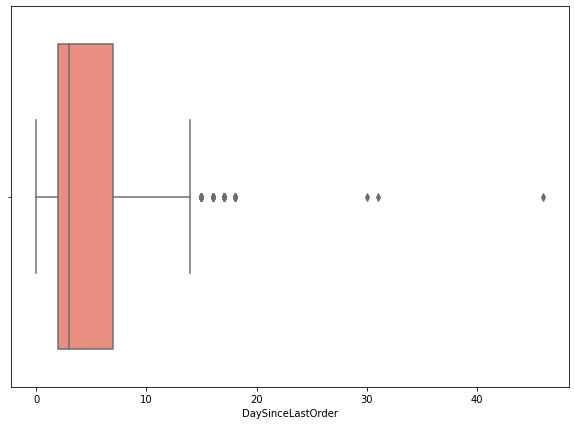

In [127]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.DaySinceLastOrder, color='Salmon')

In [128]:
data_dt.DaySinceLastOrder.isnull().sum()

307

In [129]:
## if everyone has placed an order last month, how does value exceed 30 days? 41 is an Incorrect value - impute??

Most customers have placed an order in at least 14 days/ fortnight. Some over 2 weeks, and a few, many days back. 

#### CashbackAmount

In [130]:
data_dt.CashbackAmount.describe()

count    5630.000000
mean      177.223030
std        49.207036
min         0.000000
25%       145.770000
50%       163.280000
75%       196.392500
max       324.990000
Name: CashbackAmount, dtype: float64

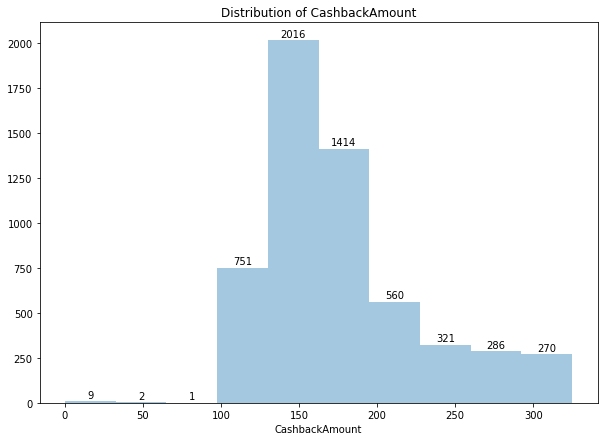

In [131]:
# plot histogram 
ax = plt.figure(figsize=(10,7))
ax = sns.distplot(data_dt['CashbackAmount'], bins=10, kde=False)
ax.set(title="Distribution of CashbackAmount")
# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
    # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
            y = height+20, # y-coordinate position of data label
            s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
            ha = 'center') # sets horizontal alignment (ha) to center


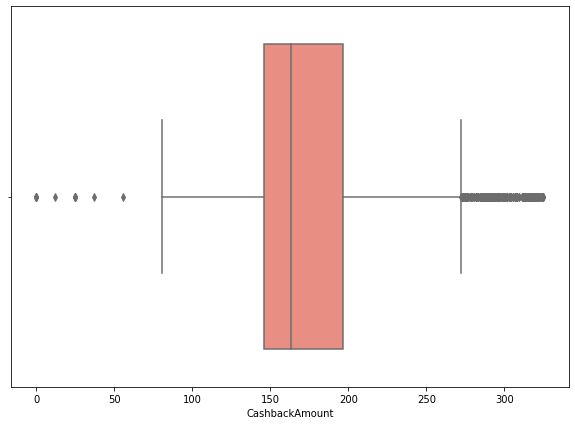

In [132]:
plt.figure(figsize=(10,7))
sns.boxplot(data_dt.CashbackAmount, color='Salmon')

#### Skew

In [133]:
data_dt[data_num].skew(axis = 0, skipna = True)

Tenure                         0.736513
WarehouseToHome                1.619154
HourSpendOnApp                -0.027213
NumberOfDeviceRegistered      -0.396969
NumberOfAddress                1.088639
OrderAmountHikeFromlastYear    0.790785
CouponUsed                     2.545653
OrderCount                     2.196414
DaySinceLastOrder              1.191000
CashbackAmount                 1.149846
dtype: float64

<b>Note: </b>At this stage, 3 categorical variables have been modified: PreferredLoginDevice, PreferredPaymentMode, PreferedOrderCat.
<br>data_vt is the dataframe with the transformed variables. 

In [135]:
data_vt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   object 
 1   Churn                        5630 non-null   object 
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   object 
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### EDA - BIVARIATE

#### Assessing Correlation between Numeric Variables using pairplot and heatmap

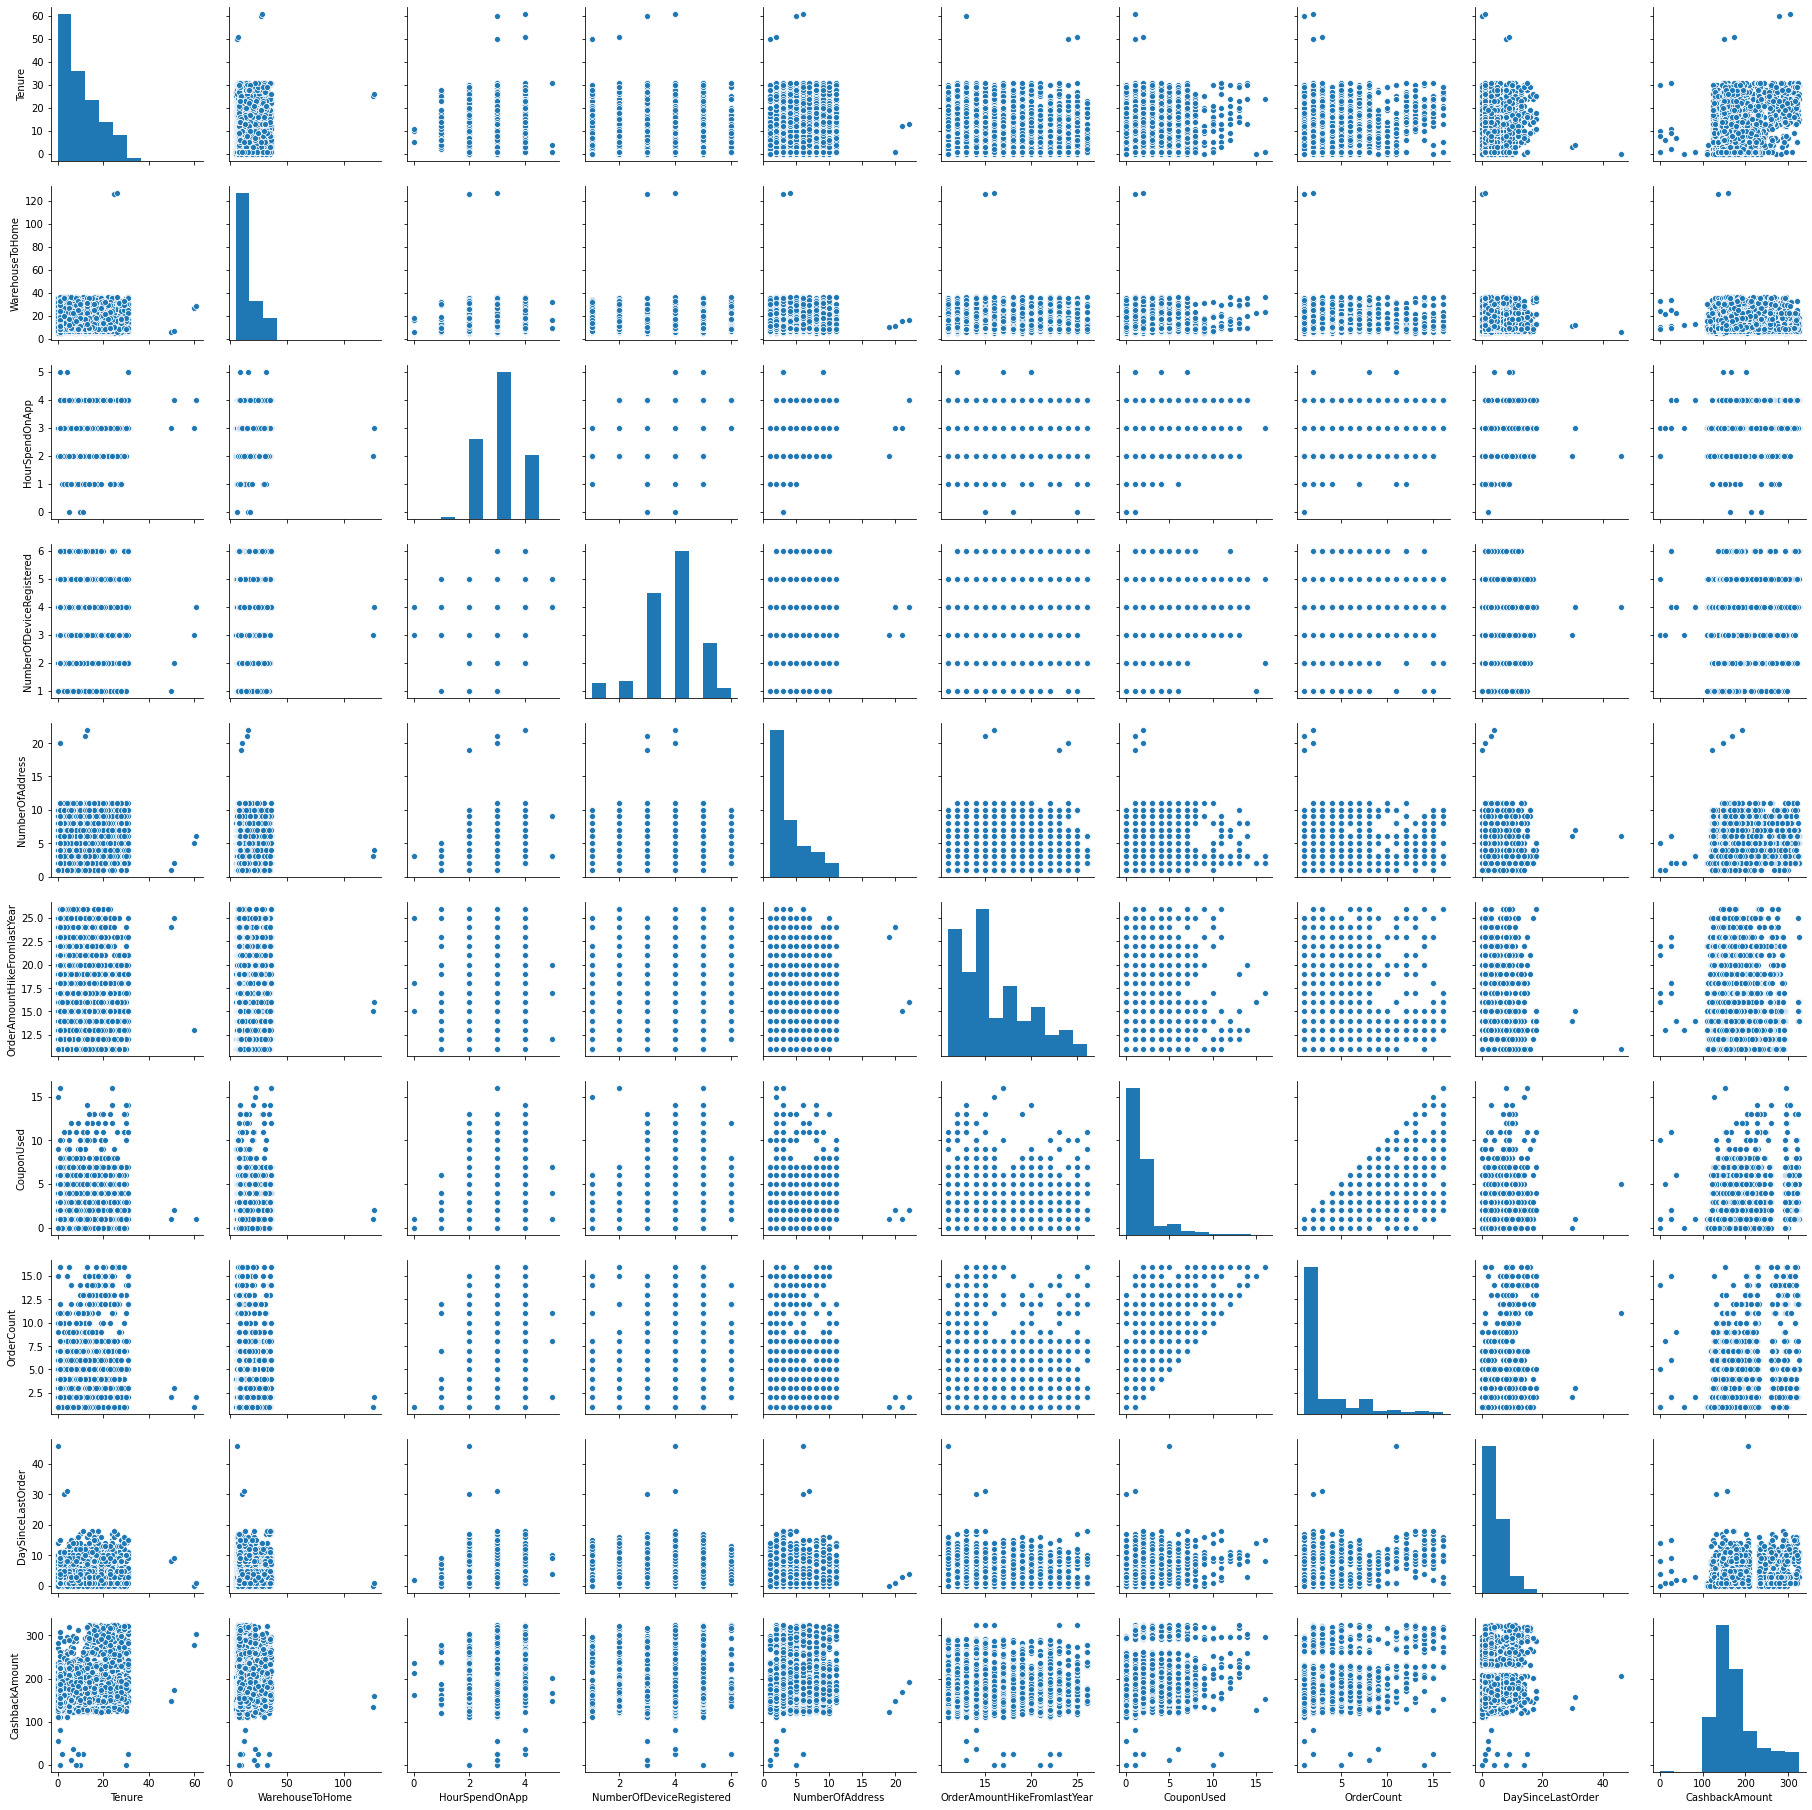

In [137]:
sns.pairplot(data_vt[data_num])

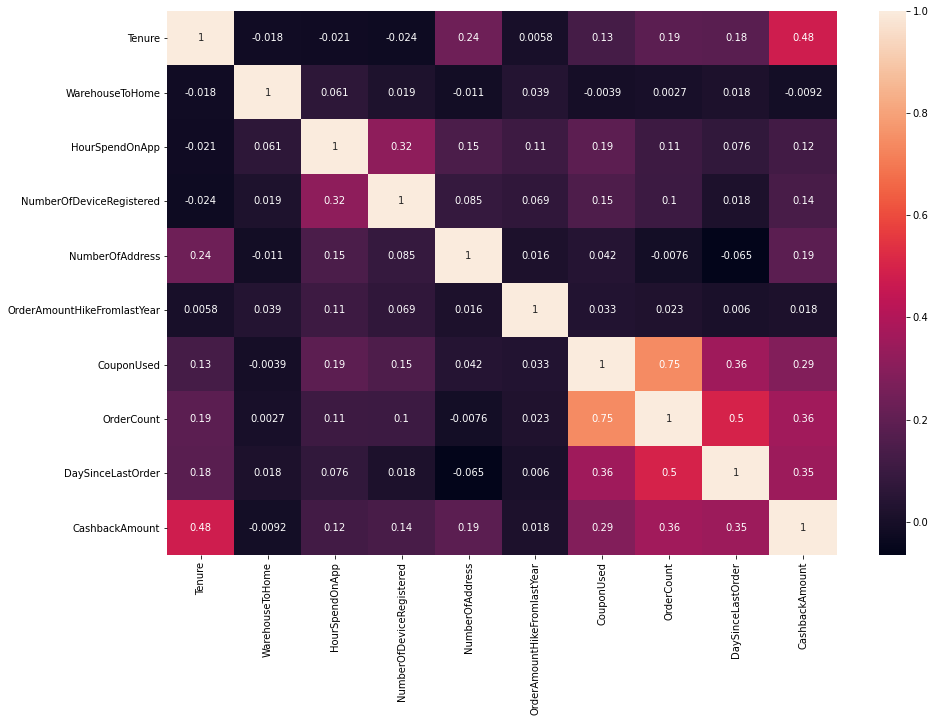

In [138]:
plt.figure(figsize=(15,10))
sns.heatmap(data_vt[data_num].corr(), annot=True)

<b>Note: </b> Only CouponsUsed and OrderCount appear to have a strong correlation; rest are not significantly correlated.

#### Bivariate analysis of Churn (target variable) with independent Numeric variables:

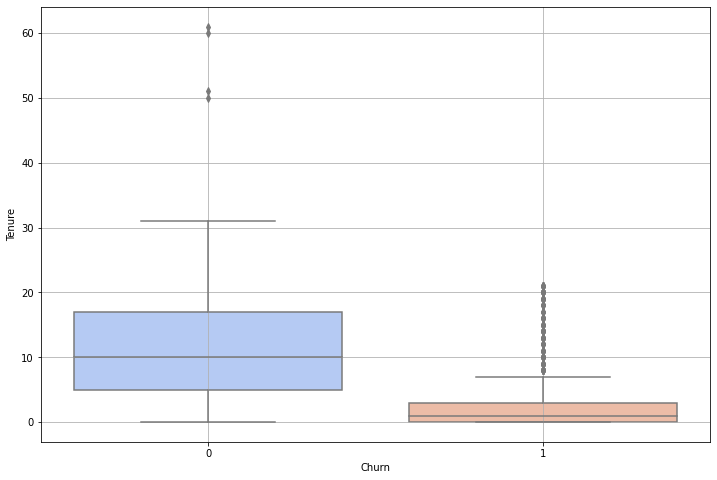

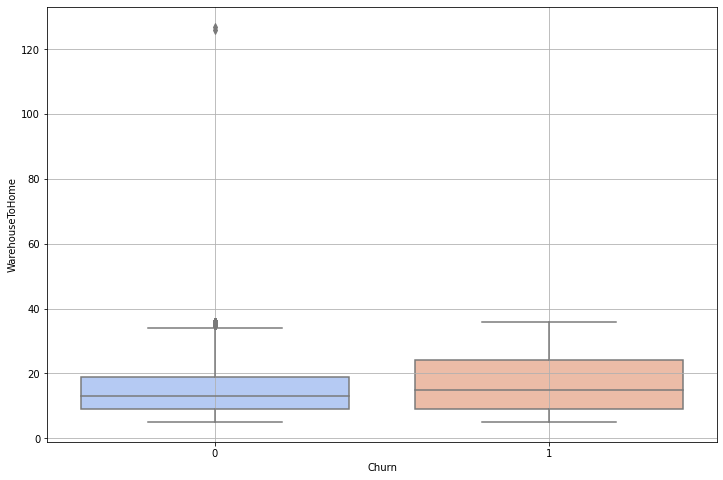

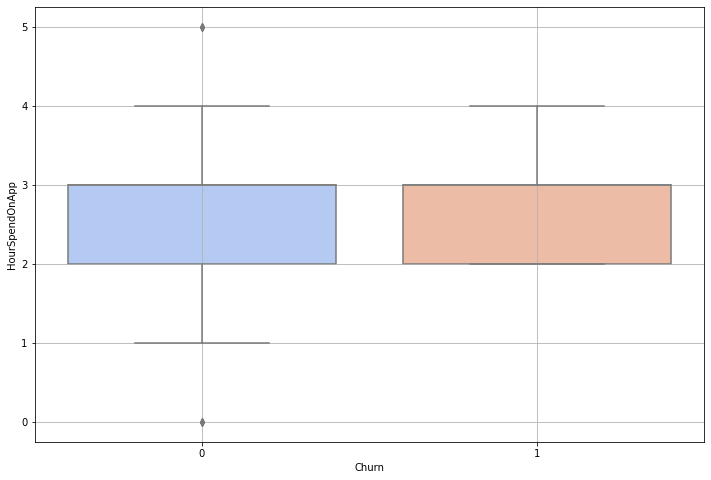

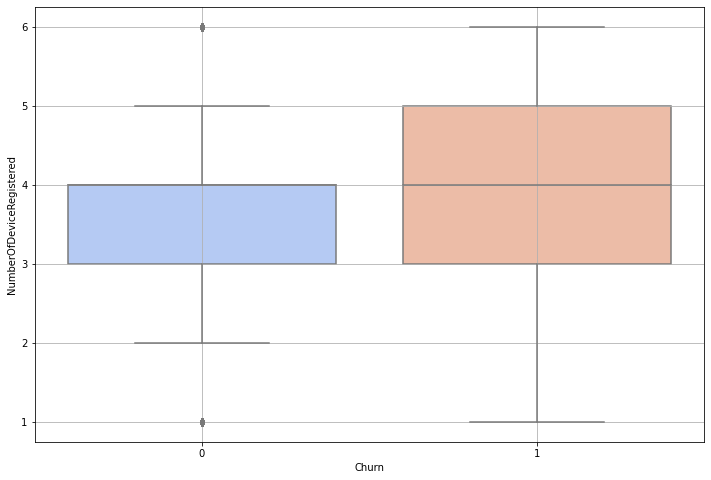

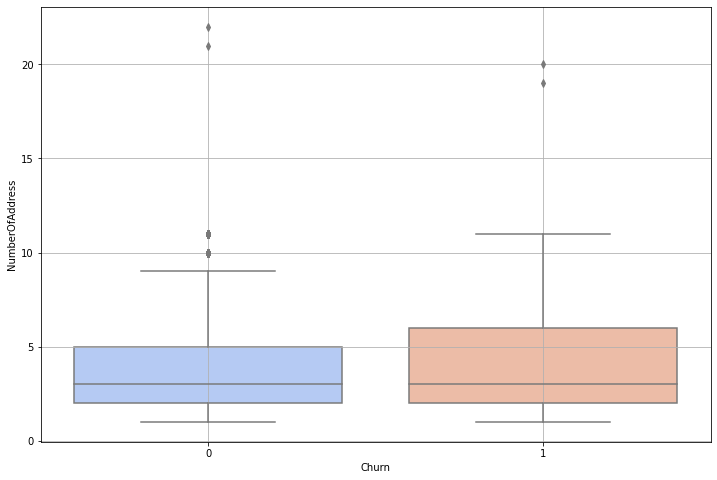

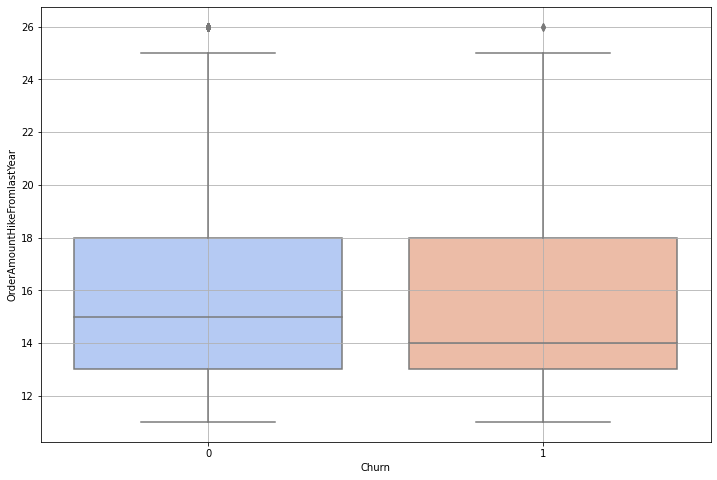

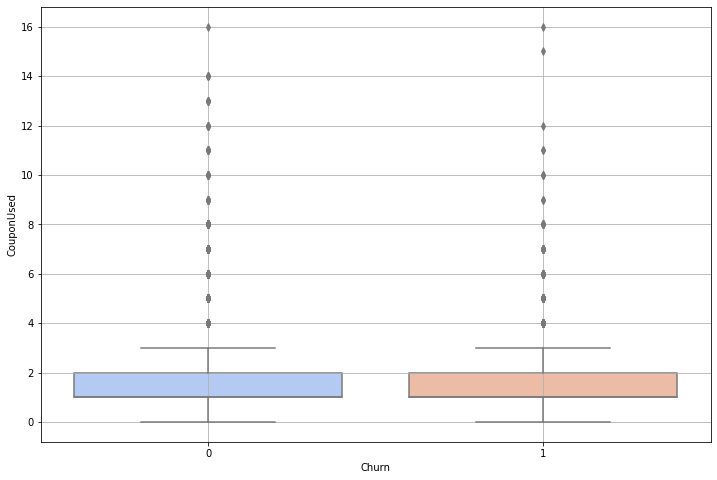

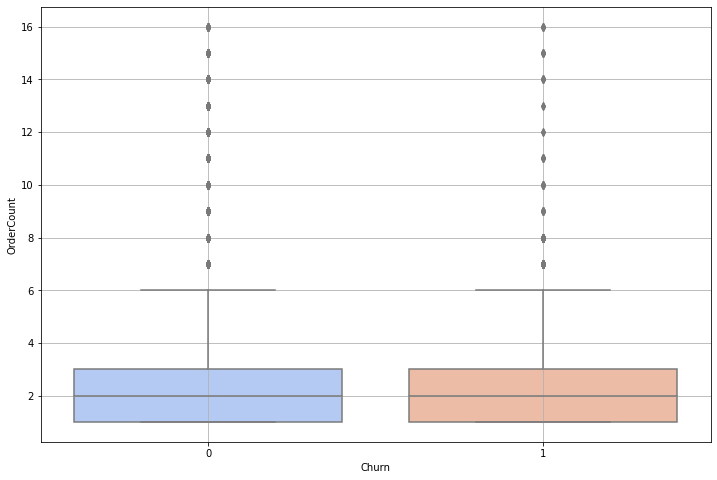

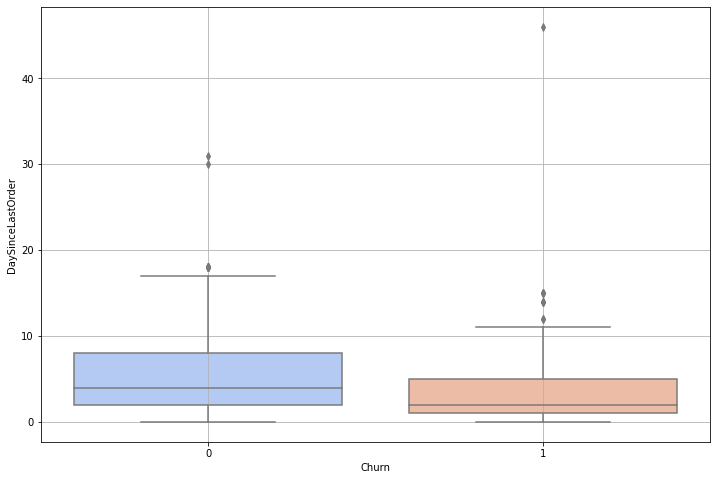

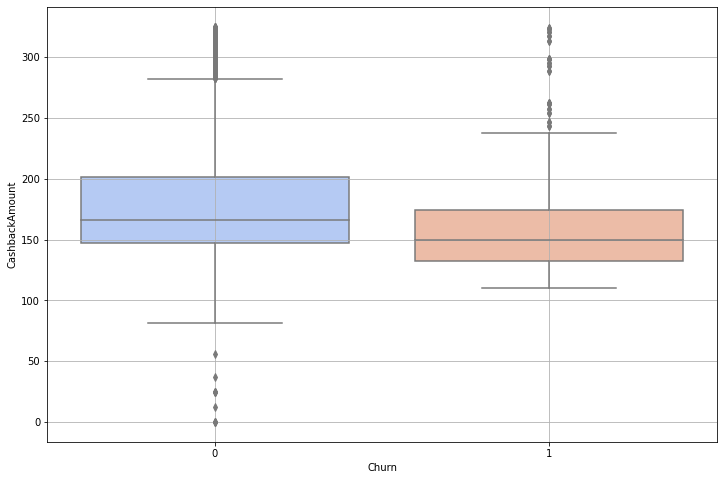

In [400]:
for column in data_num:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=data_vt['Churn'],y=data_vt[column].dropna(), palette='coolwarm')
    plt.grid()
    plt.show()

Note: Tenure appears to be an important discriminator for Churn. Tenure of over 8, and especially over 20 typically indicates No Churn. 

#### Bivariate analysis of Churn (target variable) with independent Categorical variables:

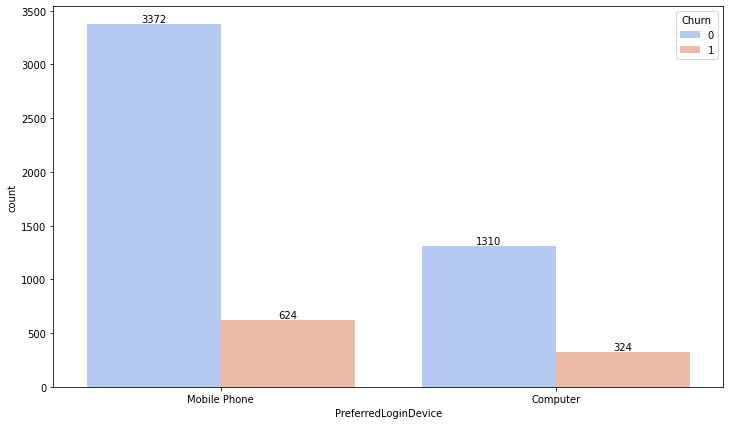

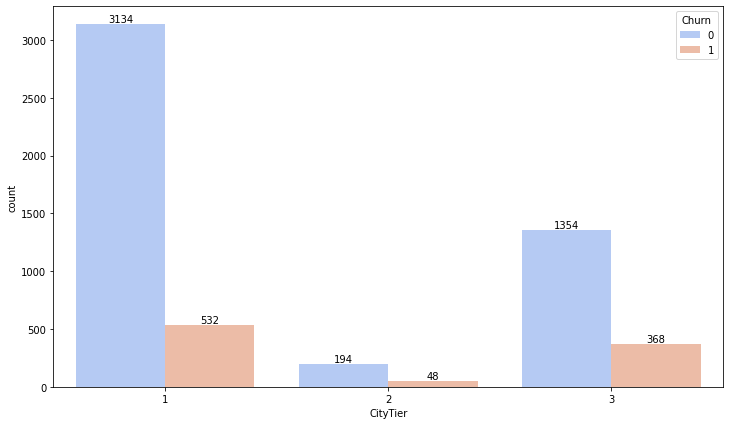

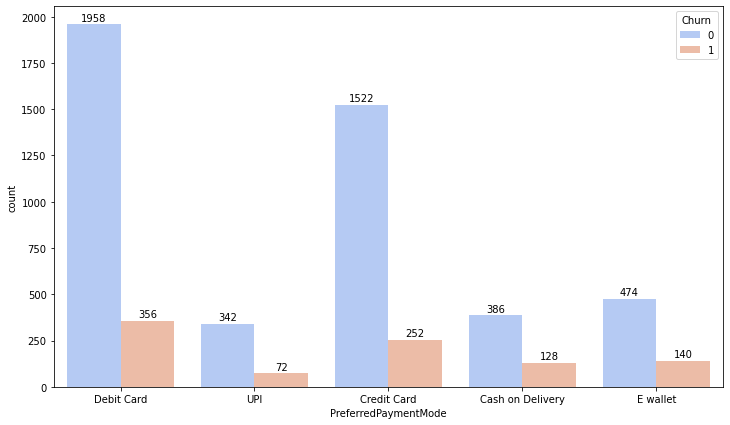

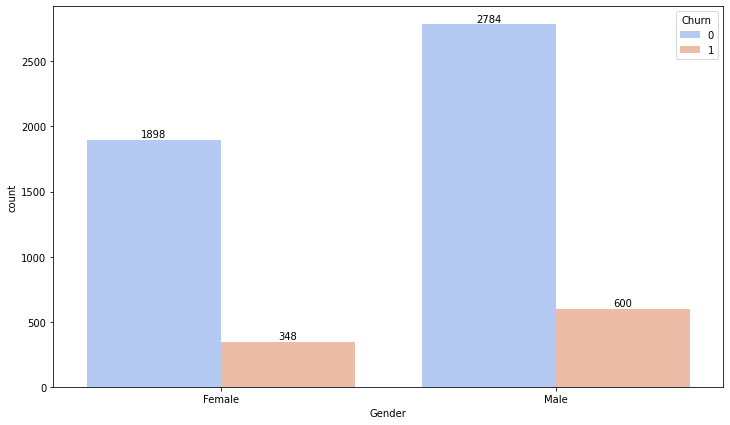

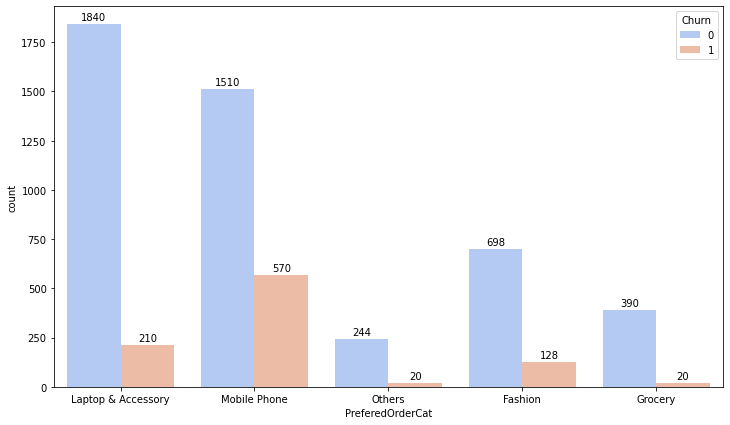

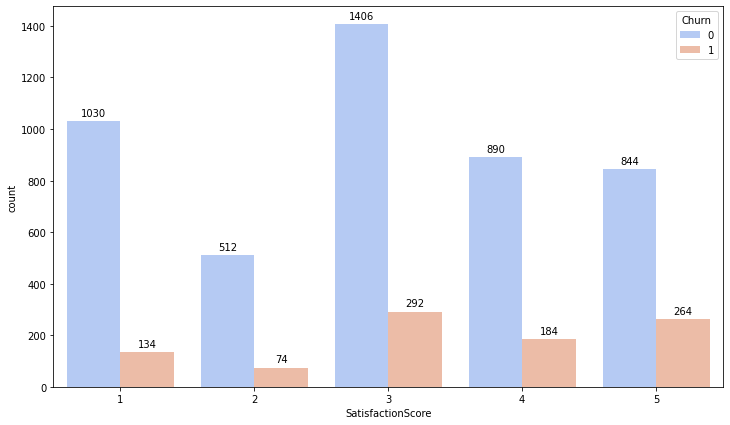

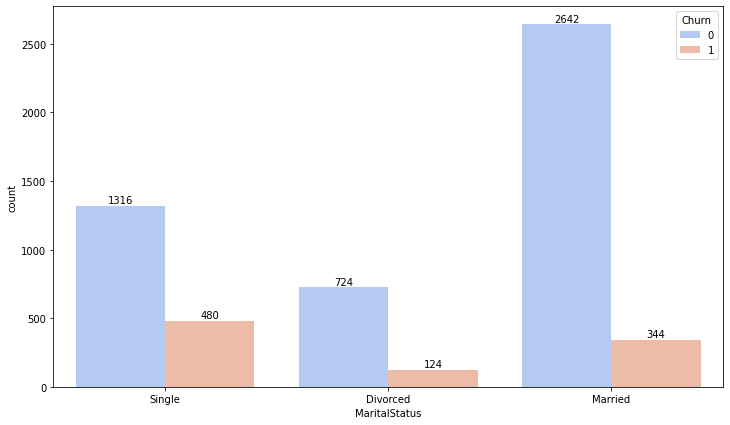

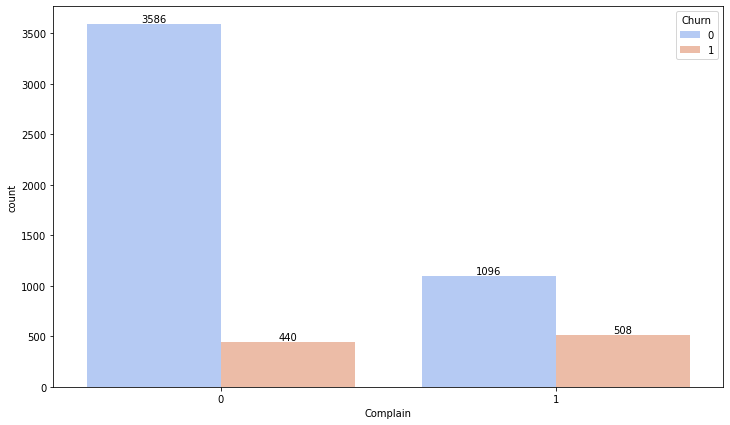

In [401]:
for column in data_cat:
    ax = plt.figure(figsize=(12,7))
    ax = sns.countplot(data_vt[column], hue=data_vt['Churn'], palette='coolwarm')
    # label each bar in histogram
    for p in ax.patches:
        height = p.get_height() # get the height of each bar
        # adding text to each bar
        ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, centred
                y = height+20, # y-coordinate position of data label
                s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
                ha = 'center') # sets horizontal alignment (ha) to center

    plt.show()

crosstab
row: categories of each variable
column: count of churn, and not churn
margins

In [404]:
test_a = pd.crosstab(data_vt.Churn, data_vt['PreferredLoginDevice'], margins=True, normalize=True)

In [405]:
test_a

PreferredLoginDevice,Computer,Mobile Phone,All
Churn,,,
0,0.232682,0.598934,0.831616
1,0.057549,0.110835,0.168384
All,0.290231,0.709769,1.000000


In [407]:
test_a.iloc[1,0]

0.057548845470692715

In [408]:
test_a.iloc[1,1]

0.1108348134991119

In [410]:
test_a.shape[1]

3

In [411]:
for column in data_cat:
    temp_tab = pd.crosstab(data_vt.Churn, data_vt[column], margins=True, normalize=True)
    print(temp_tab)
    cols = temp_tab.shape[1] - 1
    col = 0
    while col < cols:
        print(temp_tab.iloc[1,col]/temp_tab.iloc[2,col])
        col = col + 1
    print()
    print('\n')

PreferredLoginDevice  Computer  Mobile Phone       All
Churn                                                 
0                     0.232682      0.598934  0.831616
1                     0.057549      0.110835  0.168384
All                   0.290231      0.709769  1.000000
0.19828641370869032
0.15615615615615616



CityTier         1         2         3       All
Churn                                           
0         0.556661  0.034458  0.240497  0.831616
1         0.094494  0.008526  0.065364  0.168384
All       0.651155  0.042984  0.305861  1.000000
0.14511729405346424
0.1983471074380165
0.21370499419279906



PreferredPaymentMode  Cash on Delivery  Credit Card  Debit Card  E wallet  \
Churn                                                                       
0                             0.068561     0.270337    0.347780  0.084192   
1                             0.022735     0.044760    0.063233  0.024867   
All                           0.091297     0.315098    0.411012  0.

#### Bivariate Analysis of Categorical and Numeric variables - for Missing Value imputation

In [642]:
data_vt.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

#### There are 7 numeric columns that have missing values. We will now study if there is any association between these numeric variables and categorical variables, so that we can better impute the missing values

MISSING VALUES in columns: Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder

In [143]:
data_vt.Tenure.describe()

count    5366.000000
mean       10.189899
std         8.557241
min         0.000000
25%         2.000000
50%         9.000000
75%        16.000000
max        61.000000
Name: Tenure, dtype: float64

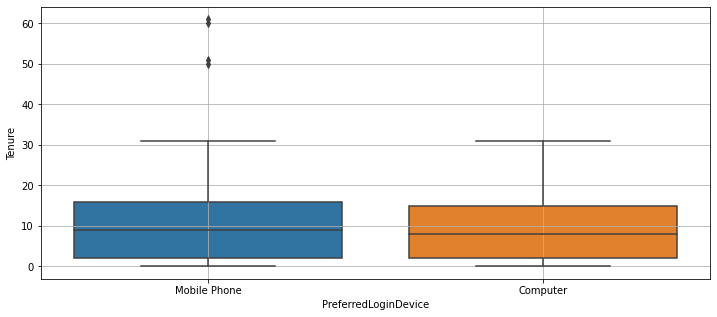

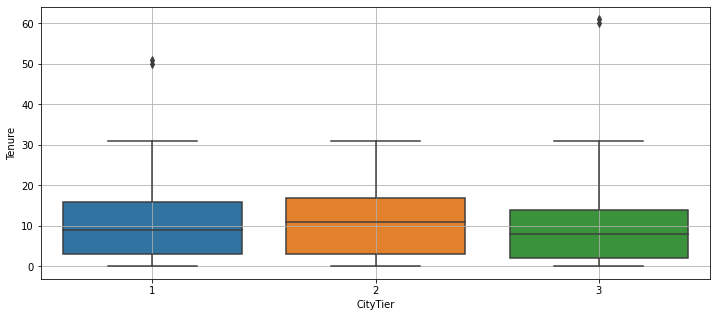

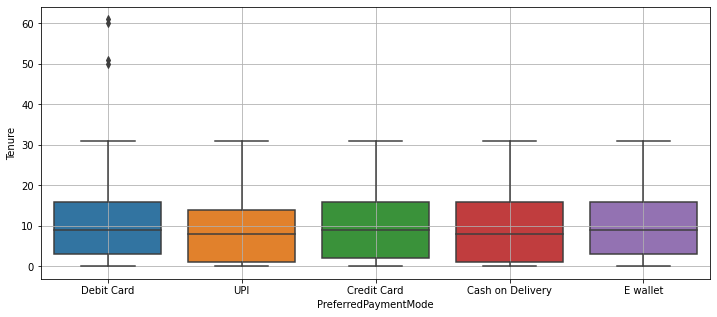

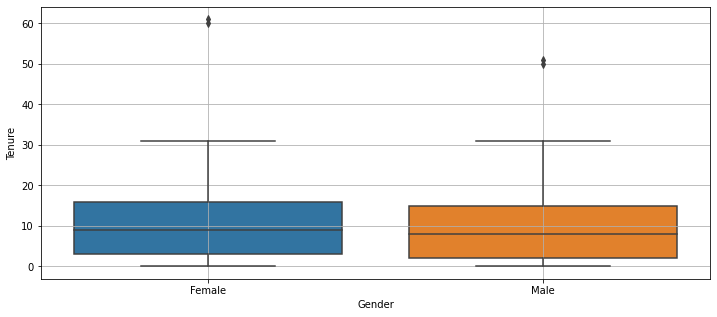

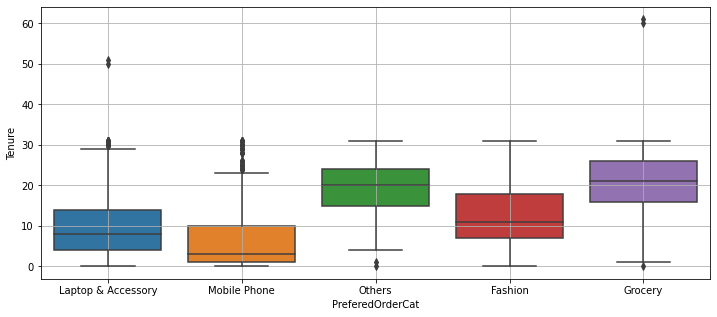

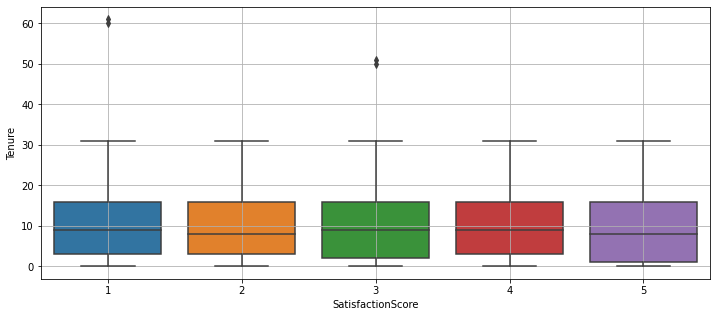

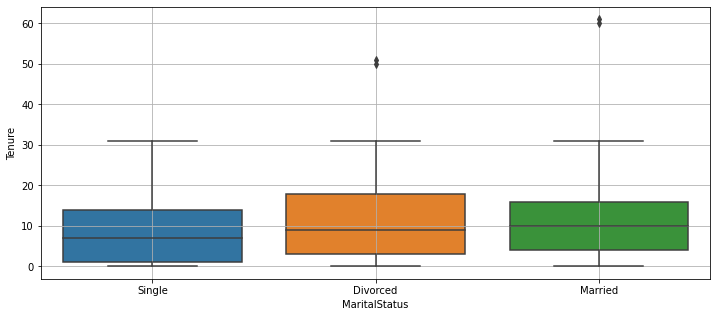

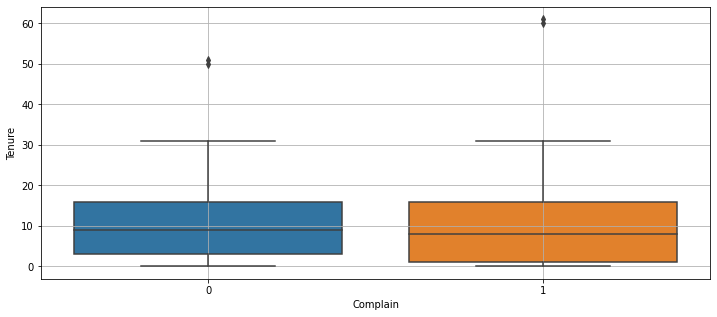

In [144]:
for column in data_cat:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=data_vt[column],y=data_vt['Tenure'])
    plt.grid()
    plt.show()

In [145]:
## Tenure varies for categories across: PreferedOrderCat, MaritalStatus

In [146]:
data_vt.WarehouseToHome.describe()

count    5379.000000
mean       15.639896
std         8.531475
min         5.000000
25%         9.000000
50%        14.000000
75%        20.000000
max       127.000000
Name: WarehouseToHome, dtype: float64

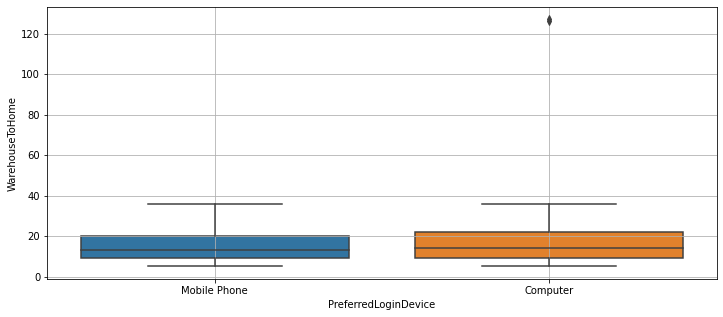

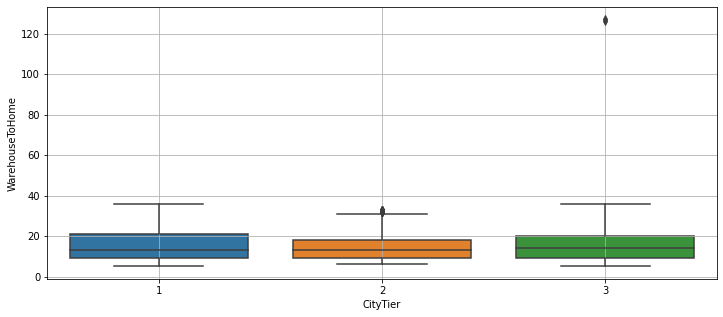

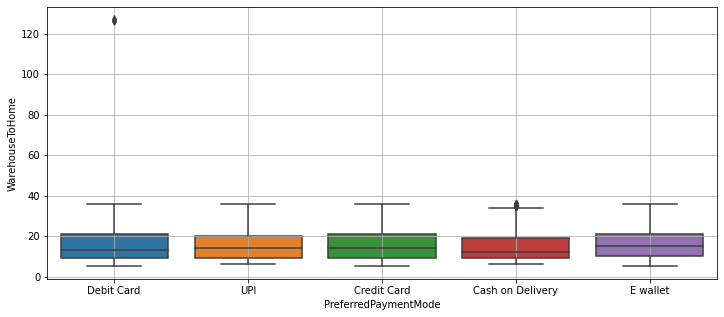

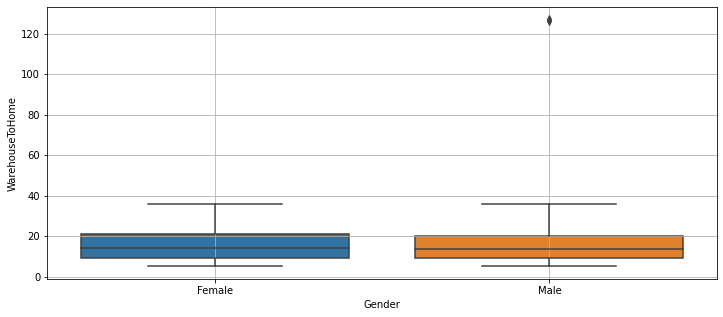

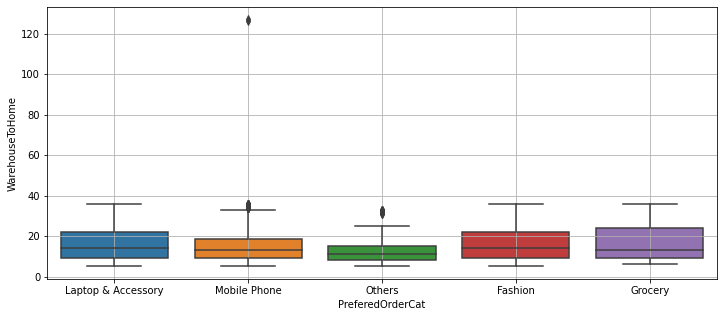

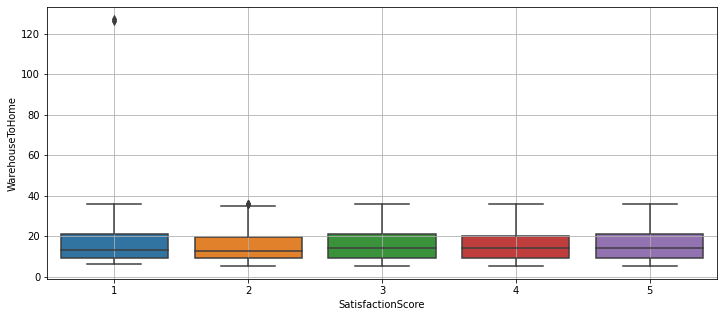

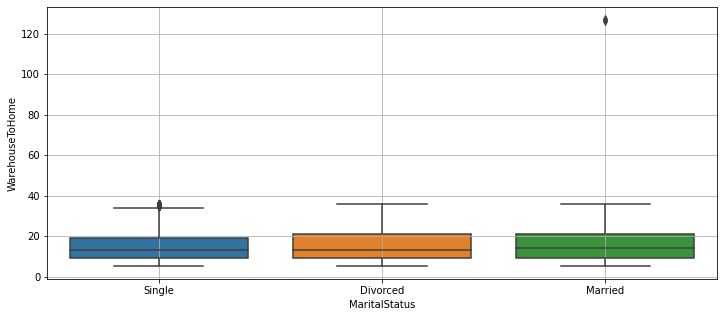

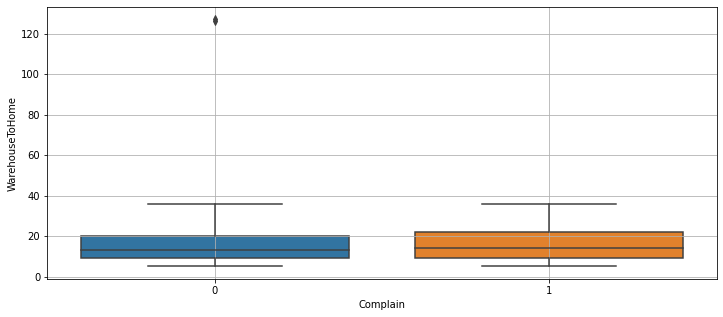

In [147]:
for column in data_cat:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=data_vt[column],y=data_vt['WarehouseToHome'])
    plt.grid()
    plt.show()

In [148]:
## no clear differentiator - PreferedOrderCat marginally

In [149]:
data_vt.HourSpendOnApp.describe()

count    5375.000000
mean        2.931535
std         0.721926
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: HourSpendOnApp, dtype: float64

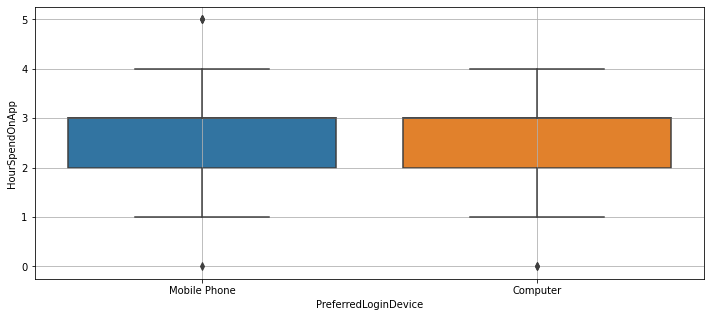

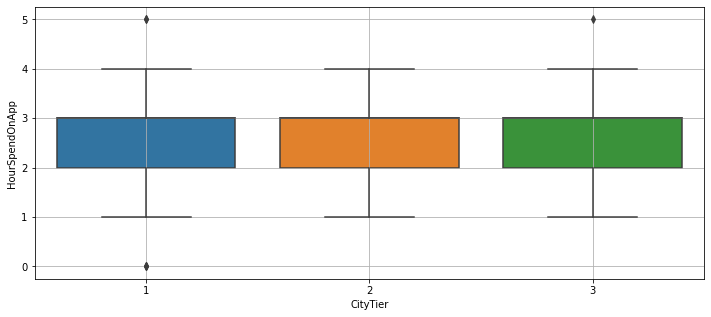

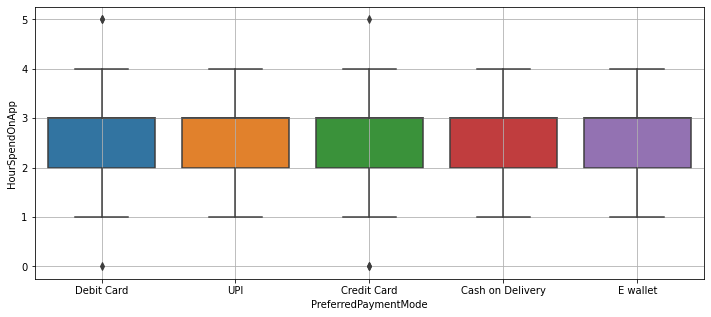

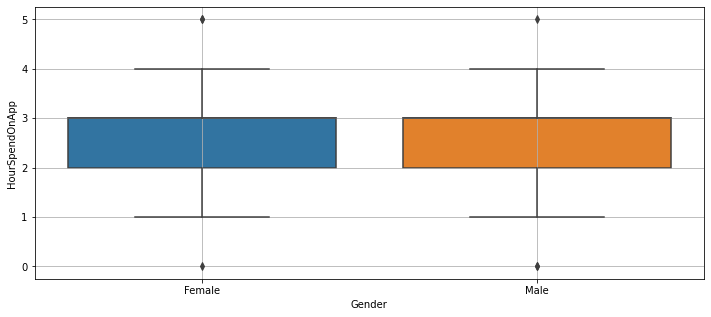

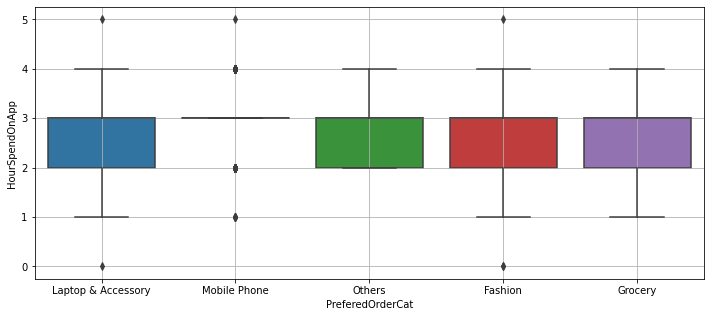

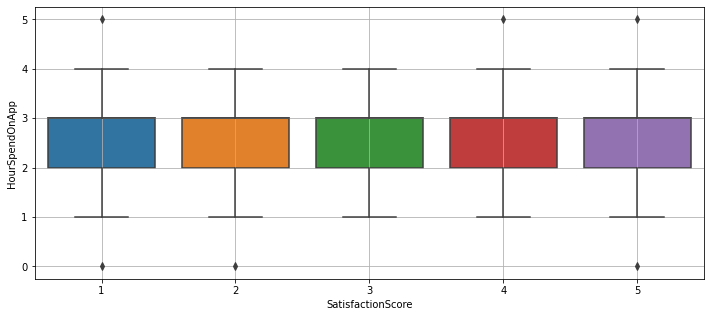

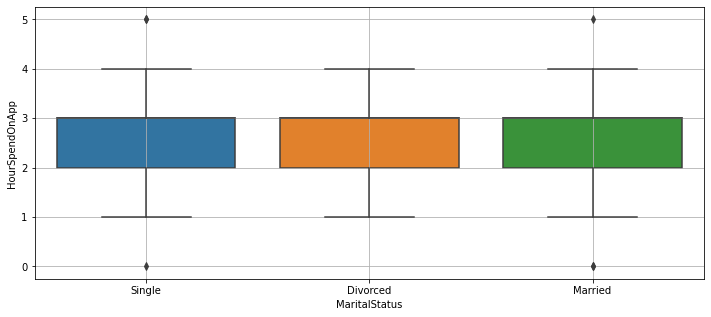

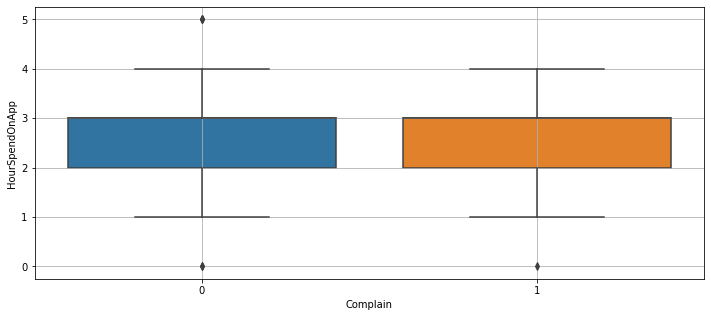

In [150]:
for column in data_cat:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=data_vt[column],y=data_vt['HourSpendOnApp'])
    plt.grid()
    plt.show()

In [151]:
## HourSpendOnApp varies for categories across:: PreferedOrderCat

In [152]:
data_vt.OrderAmountHikeFromlastYear.describe()

count    5365.000000
mean       15.707922
std         3.675485
min        11.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        26.000000
Name: OrderAmountHikeFromlastYear, dtype: float64

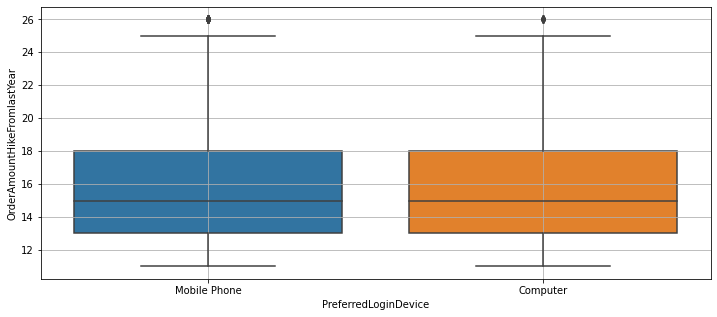

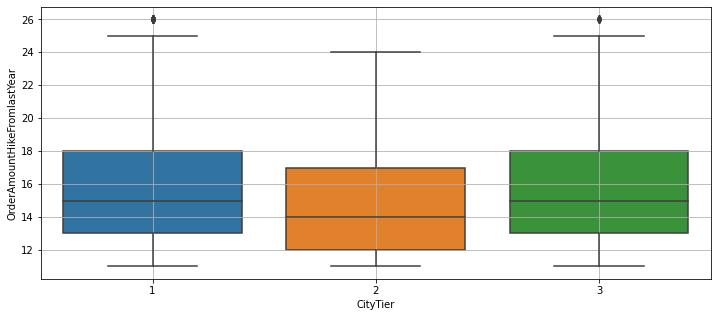

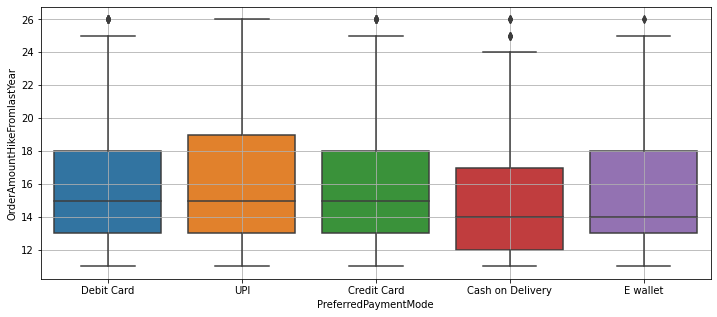

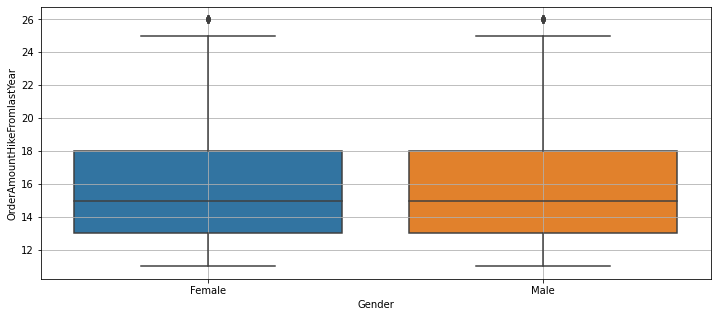

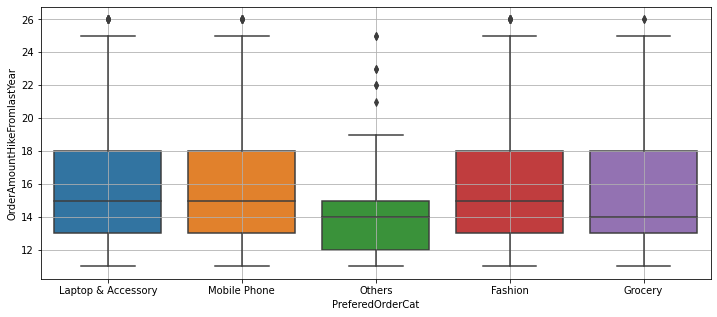

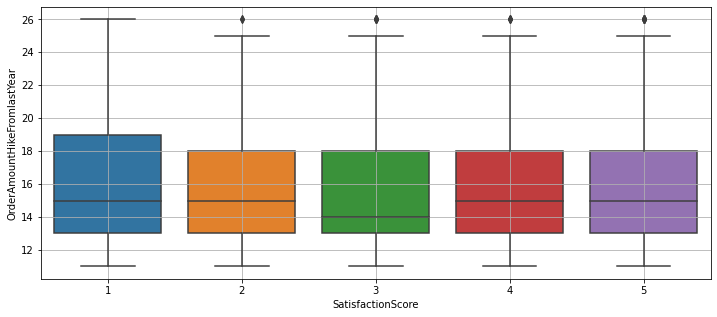

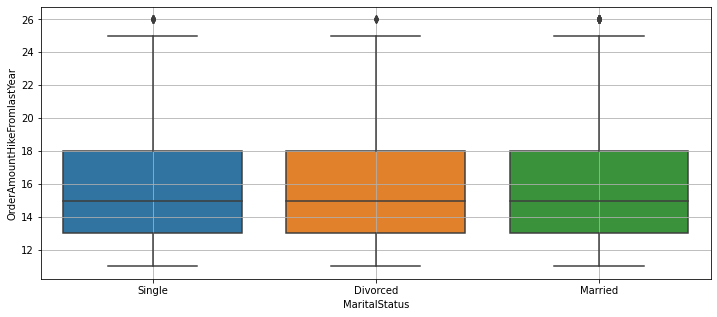

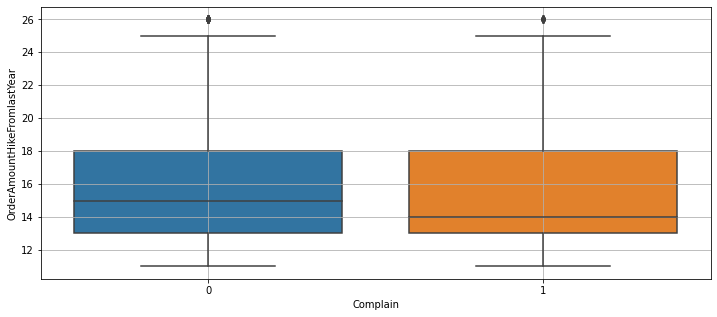

In [153]:
for column in data_cat:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=data_vt[column],y=data_vt['OrderAmountHikeFromlastYear'])
    plt.grid()
    plt.show()

In [154]:
## OrderAmountHikeFromlastYear varies for many categories between 15, 16. choose any one, maybe PreferedOrderCat.

In [155]:
data_vt.CouponUsed.describe()

count    5374.000000
mean        1.751023
std         1.894621
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: CouponUsed, dtype: float64

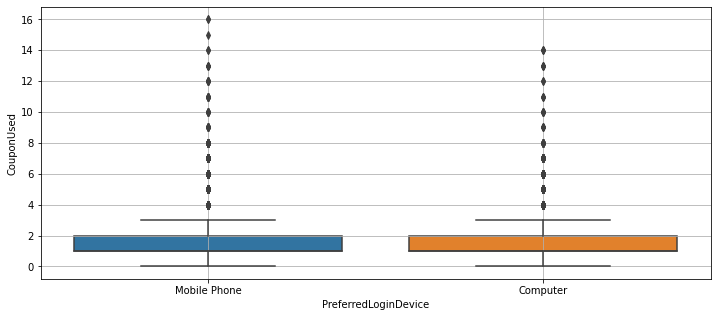

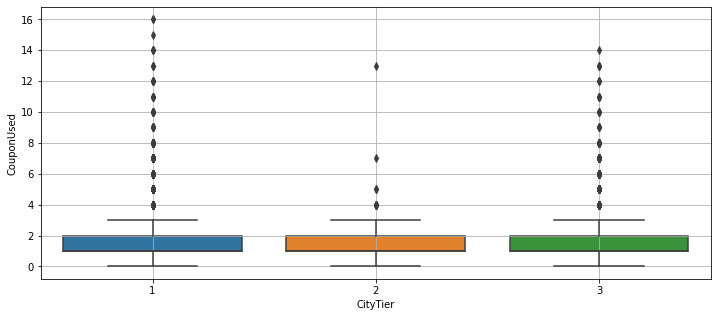

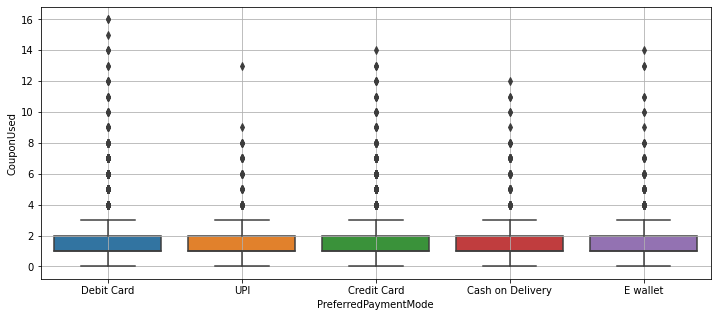

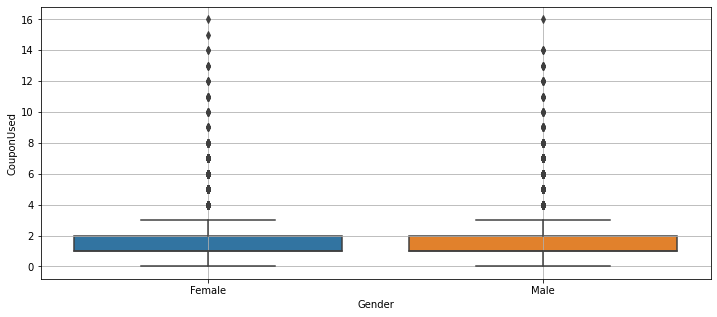

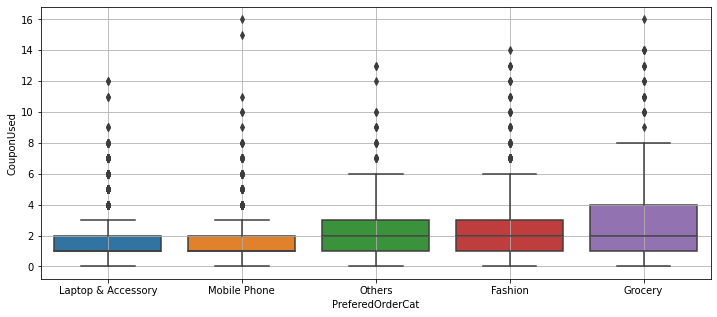

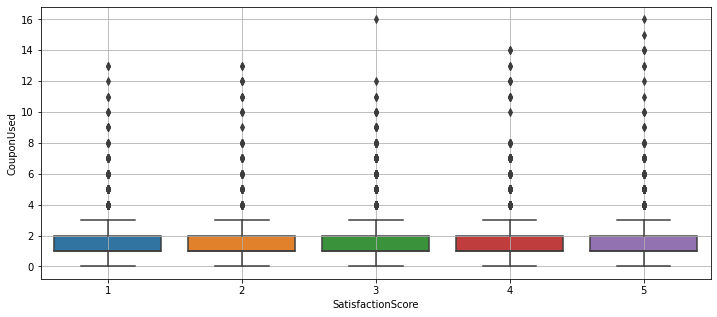

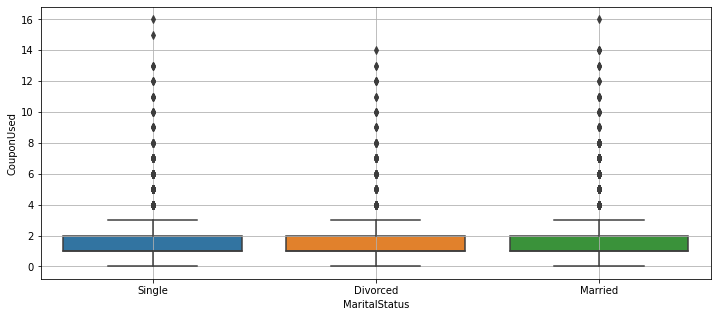

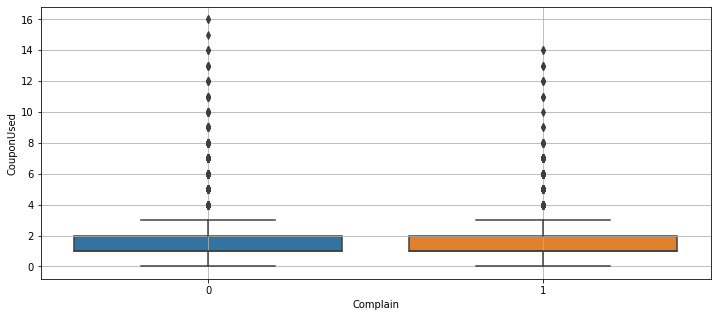

In [156]:
for column in data_cat:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=data_vt[column],y=data_vt['CouponUsed'])
    plt.grid()
    plt.show()

In [157]:
## CouponUsed varies for categories across: PreferedOrderCat

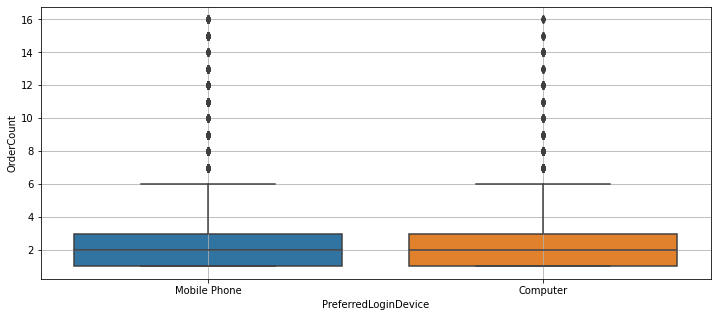

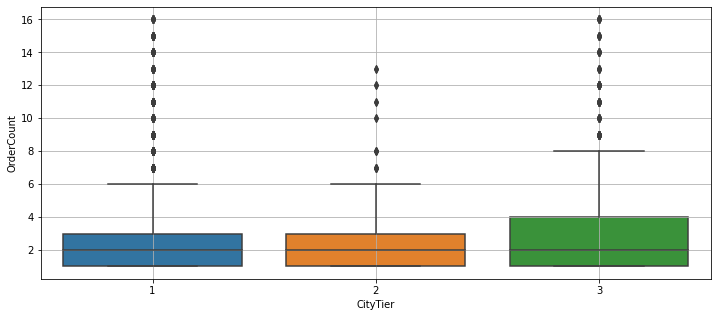

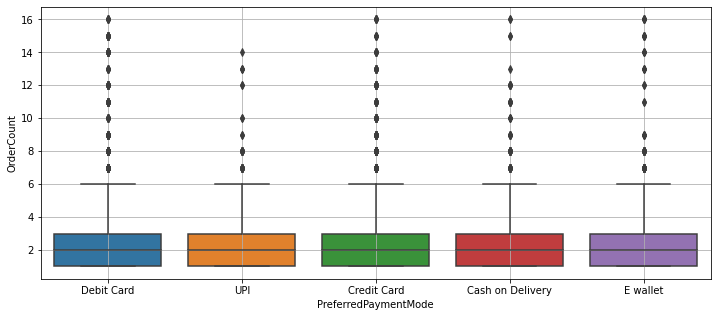

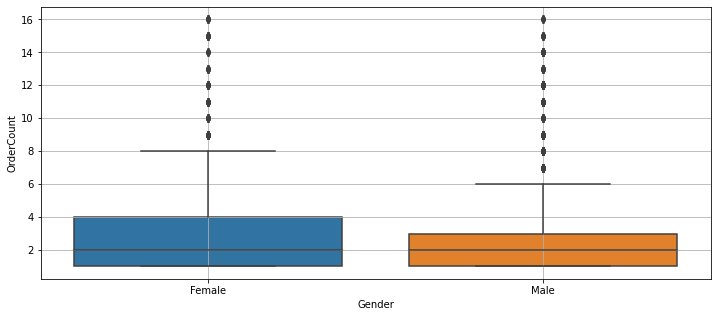

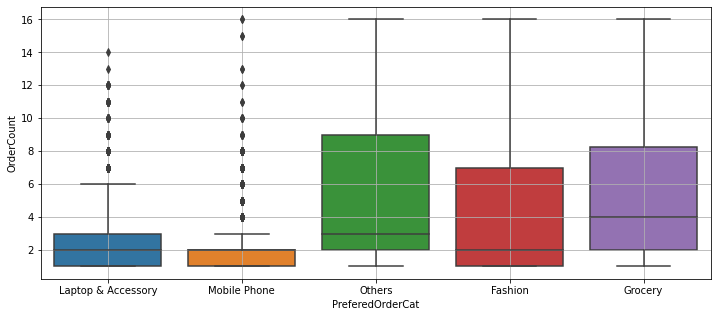

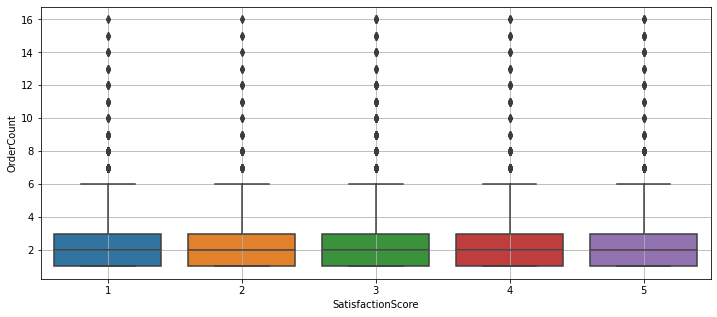

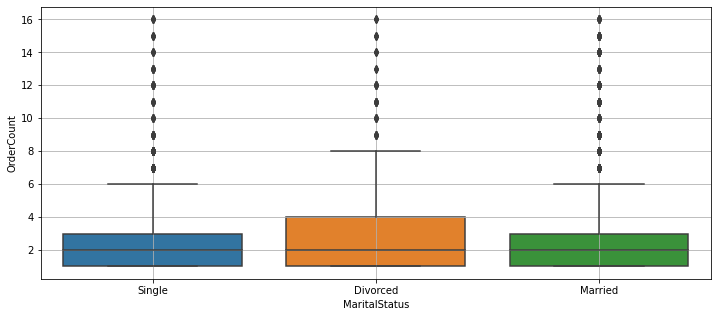

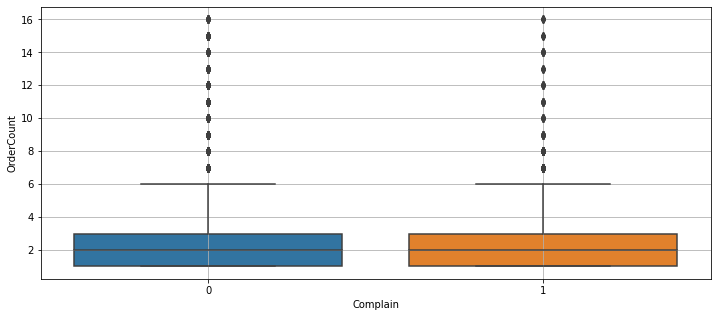

In [653]:
for column in data_cat:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=data_vt[column],y=data_vt['OrderCount'])
    plt.grid()
    plt.show()

In [654]:
## OrderCount varies for categories across: PreferredOrderCat

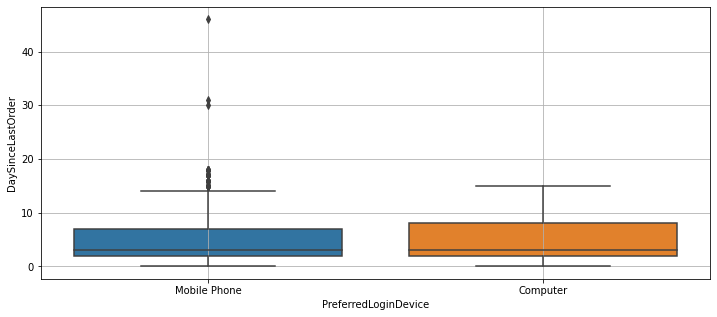

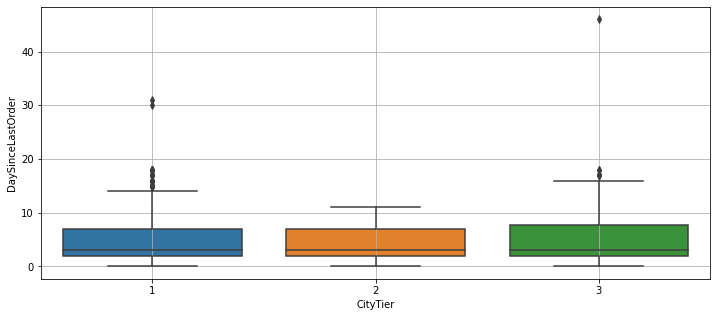

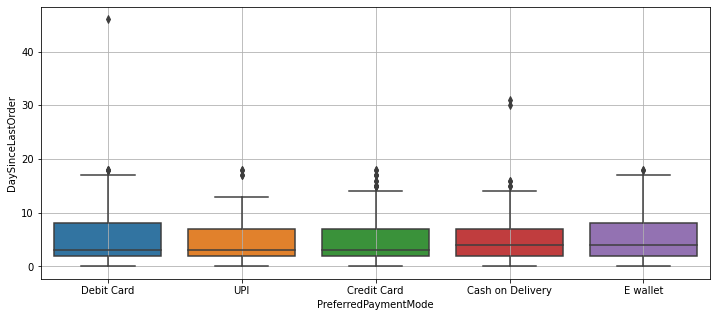

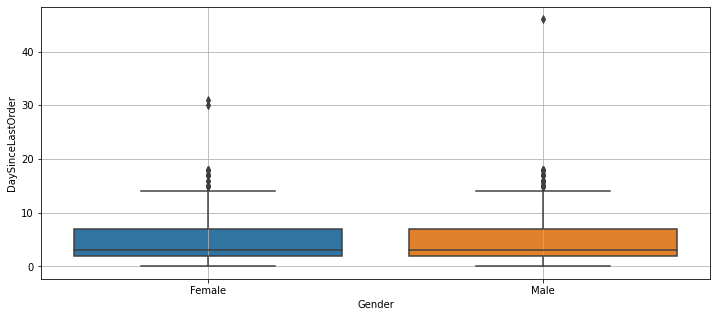

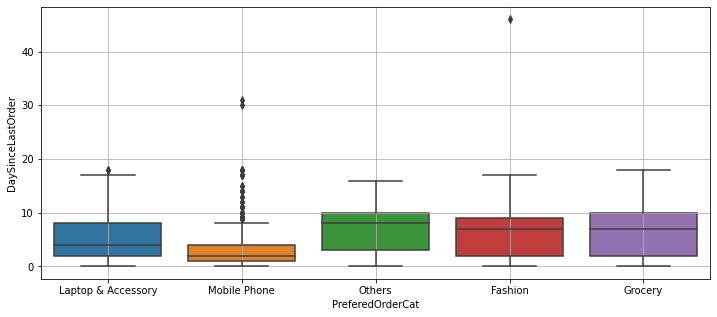

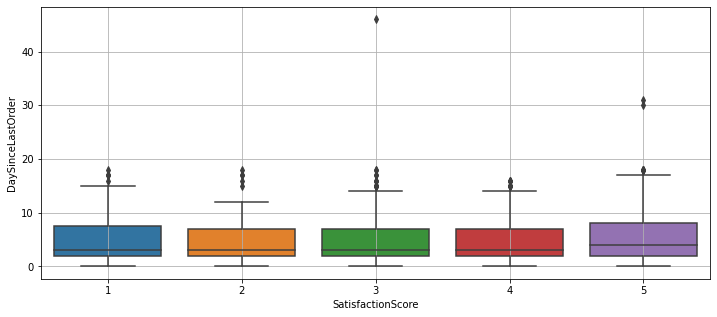

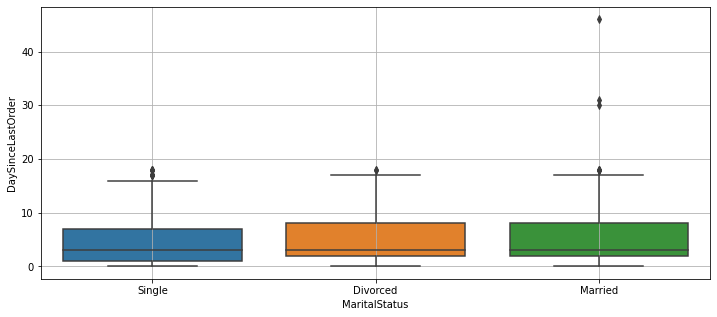

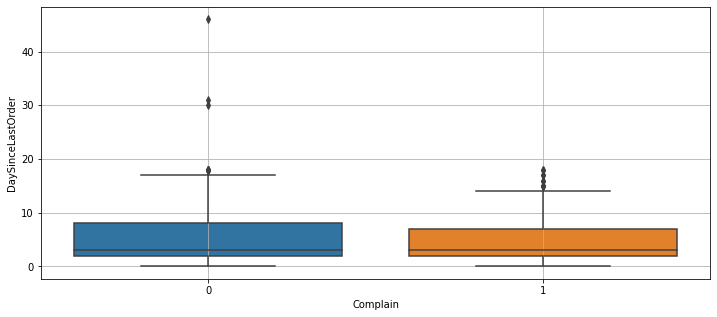

In [655]:
for column in data_cat:
    plt.figure(figsize=(12,5))
    sns.boxplot(x=data_vt[column],y=data_vt['DaySinceLastOrder'])
    plt.grid()
    plt.show()

In [656]:
## DaySinceLastOrder varies for categories across:: PreferedOrderCat

#### Observation: It appears that most of the numeric variables with missing values vary with PreferedOrderCat. 

Hence PreferedOrderCat is a useful variable to segment customers: and can be used to impute missing values based on segments for each variable. <br>Only for Tenure, we will use PreferedOrderCat along with MaritalStatus to impute missing values. 

In [182]:
data_vt.groupby(['PreferedOrderCat', 'MaritalStatus'])['Tenure'].median()

PreferedOrderCat    MaritalStatus
Fashion             Divorced         11.0
                    Married          11.0
                    Single           11.0
Grocery             Divorced         21.0
                    Married          21.0
                    Single           22.0
Laptop & Accessory  Divorced          7.0
                    Married           9.0
                    Single            8.0
Mobile Phone        Divorced          5.0
                    Married           5.0
                    Single            1.0
Others              Divorced         18.5
                    Married          20.0
                    Single           21.0
Name: Tenure, dtype: float64

In [183]:
data_vt.groupby(['PreferedOrderCat'])['Tenure'].median()

PreferedOrderCat
Fashion               11.0
Grocery               21.0
Laptop & Accessory     8.0
Mobile Phone           3.0
Others                20.0
Name: Tenure, dtype: float64

In [184]:
data_vt.groupby(['PreferedOrderCat'])['DaySinceLastOrder'].median()

PreferedOrderCat
Fashion               7.0
Grocery               7.0
Laptop & Accessory    4.0
Mobile Phone          2.0
Others                8.0
Name: DaySinceLastOrder, dtype: float64

### DROPPING UNWANTED COLUMNS

In [163]:
data_vt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   object 
 1   Churn                        5630 non-null   object 
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   object 
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

At this stage we will drop CustomerID because we won't be using it for building our model. 

In [164]:
data_vt.drop('CustomerID', axis=1, inplace=True)

In [166]:
data_vt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   object 
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

We now proceed with only 19 columns

### MISSING VALUE TREATMENT

In [167]:
data_mvt = data_vt.copy()

In [169]:
data_mvt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   object 
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [170]:
data_mvt.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [168]:
#### Treating missing values in variable Tenure

In [171]:
data_mvt.Tenure.isnull().sum()

264

In [172]:
data_mvt['Tenure'] = data_mvt['Tenure'].fillna(data_mvt.groupby(['PreferedOrderCat','MaritalStatus'])['Tenure'].transform('median'))

In [173]:
data_mvt.Tenure.isnull().sum()

0

In [ ]:
#### Treating missing values for all other variables in the dataset

In [176]:
data_mvt.isnull().sum()

Churn                            0
Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [175]:
nan_cols = ['WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

In [177]:
for col in nan_cols:
    data_mvt[col] = data_mvt[col].fillna(data_mvt.groupby('PreferedOrderCat')[col].transform('median'))
    

In [179]:
data_mvt.isnull().sum().sum()

0

### OUTLIER TREATMENT

In [188]:
data_omv = data_mvt.copy()

In [189]:
data_omv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   object 
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

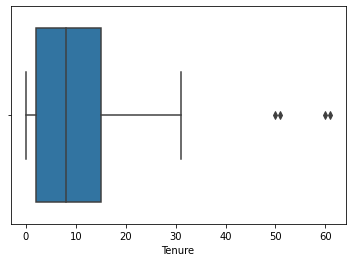

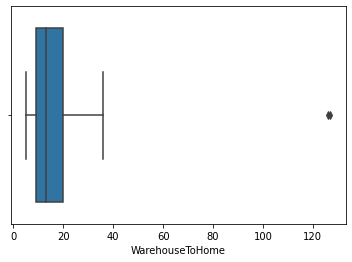

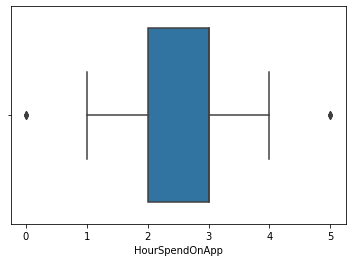

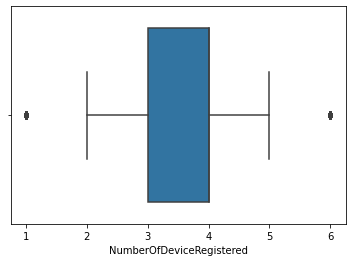

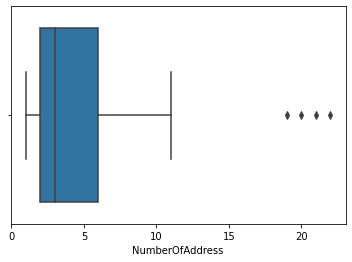

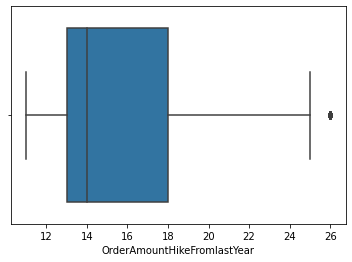

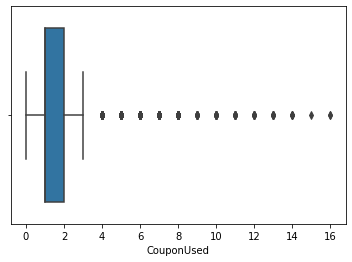

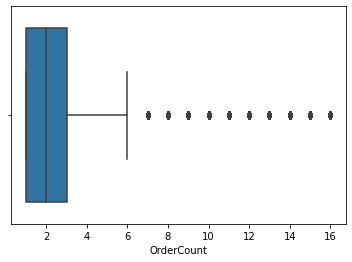

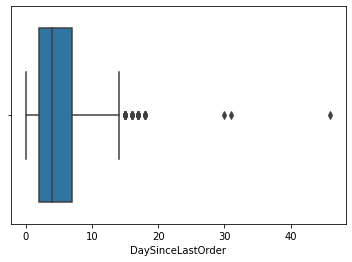

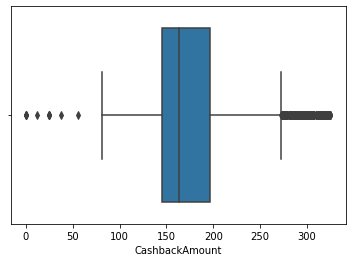

In [191]:
for column in data_num:
    sns.boxplot(data_omv[column])
    plt.show()

#### NOTE
Of the values depicted as outliers in the above boxplots:<br>
1. Tenure, WarehouseToHome, NumberOfAddress have extreme values, which are true outliers and can be capped at the Q3 + (1.5 * IQR) level
2. CouponUsed and OrderCount are valid observations, and can represent a class of high users. So we can cap them at the 99 percentile levels.
3. DaySinceLastOrder has a value of 46, which appears to be wrong, as it should not exceed 31. We will impute this with the median value, using segmentation based on variable PreferedOrderCat - similar to our missing value treatment.


In [196]:
## making 2 sets of variables
out1 = ['Tenure', 'WarehouseToHome', 'NumberOfAddress']
out2 = ['CouponUsed', 'OrderCount']

In [197]:
## the following function returns the upper and lower limits (based on the IQR measure), and the max limits based on the 99 percentile value. 

def outlier_limits(col):
    sorted(col)
    Q1,Q3=col.quantile([.25,.75])
    IQR=Q3-Q1
    lower_lim= Q1-(1.5 * IQR)
    upper_lim= Q3+(1.5 * IQR)
    max_lower_lim = col.quantile(.01)
    max_upper_lim = col.quantile(.99)
    return lower_lim, upper_lim, max_lower_lim, max_upper_lim



In [198]:
for column in data_num:
    print(column, outlier_limits(data_omv[column]))

Tenure (-17.5, 34.5, 0.0, 30.0)
WarehouseToHome (-7.5, 36.5, 6.0, 35.0)
HourSpendOnApp (0.5, 4.5, 2.0, 4.0)
NumberOfDeviceRegistered (1.5, 5.5, 1.0, 6.0)
NumberOfAddress (-4.0, 12.0, 1.0, 11.0)
OrderAmountHikeFromlastYear (5.5, 25.5, 11.0, 25.0)
CouponUsed (-0.5, 3.5, 0.0, 9.0)
OrderCount (-2.0, 6.0, 1.0, 14.0)
DaySinceLastOrder (-5.5, 14.5, 0.0, 15.0)
CashbackAmount (69.83625, 272.32625, 116.00999999999999, 318.7431)


In [199]:
## Treating set 1
for column in out1:
    ll,ul,mll,mul=outlier_limits(data_omv[column])
    data_omv[column]=np.where(data_omv[column]>ul,ul,data_omv[column])


In [201]:
## Treating set 2
for column in out2:
    ll,ul,mll,mul=outlier_limits(data_omv[column])
    data_omv[column]=np.where(data_omv[column]>mul,mul,data_omv[column])


In [207]:
data_omv.groupby(['PreferedOrderCat'])['DaySinceLastOrder'].median()

PreferedOrderCat
Fashion               7.0
Grocery               7.0
Laptop & Accessory    4.0
Mobile Phone          2.0
Others                8.0
Name: DaySinceLastOrder, dtype: float64

In [205]:
data_omv[data_omv['DaySinceLastOrder']==46]

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2040,1,0.0,Mobile Phone,3,6.0,Debit Card,Male,2.0,4,Fashion,3,Married,6.0,0,11.0,5.0,11.0,46.0,206.09


In [208]:
## Treating the apparently wrong value in DaySinceLastOrder, with the median value (segmented by PreferedOrderCat)
data_omv['DaySinceLastOrder']=np.where(data_omv['DaySinceLastOrder']==46,7,data_omv['DaySinceLastOrder'])


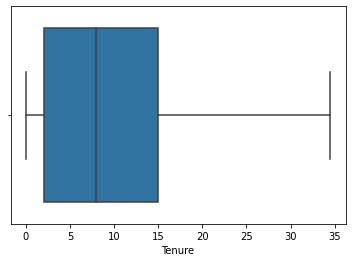

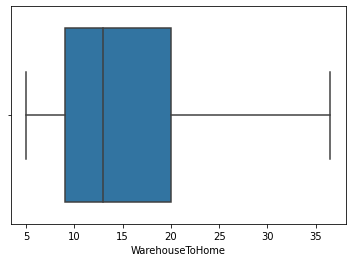

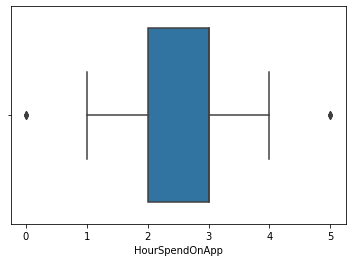

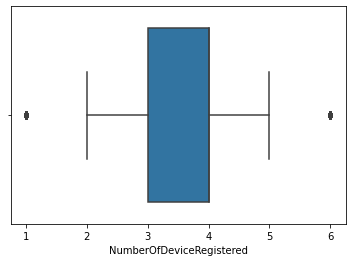

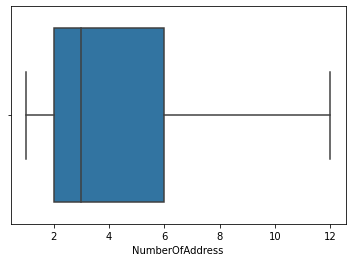

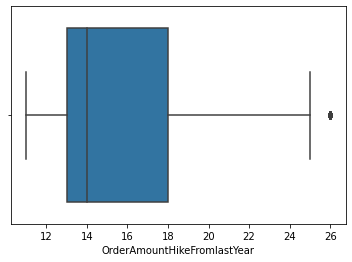

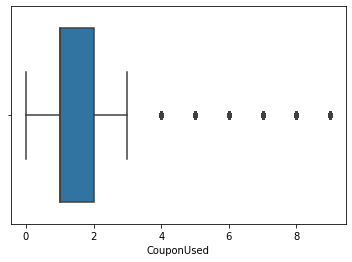

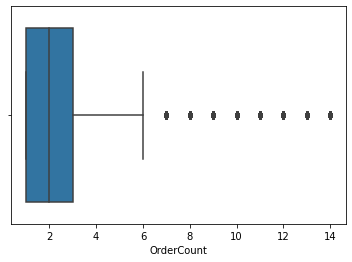

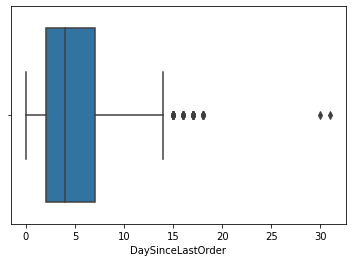

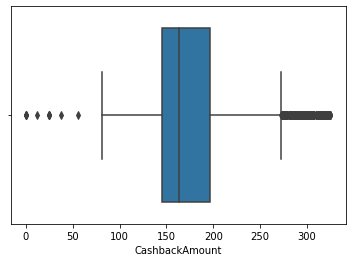

In [209]:
for column in data_num:
    sns.boxplot(data_omv[column])
    plt.show()

In [210]:
data_omv.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9.0,1,11.0,1.0,1.0,5.0,159.93
1,1,1.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7.0,1,15.0,0.0,1.0,0.0,120.90
2,1,1.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6.0,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8.0,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3.0,0,11.0,1.0,1.0,3.0,129.60


In [211]:
data_omv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   object 
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

### ENCODING

In [212]:
data_omv.describe(include='object').T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,2,Mobile Phone,3996
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,5,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,5,Mobile Phone,2080
SatisfactionScore,5630,5,3,1698
MaritalStatus,5630,3,Married,2986
Complain,5630,2,0,4026


In [214]:
data_com = data_omv.copy()

In [215]:
data_com.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9.0,1,11.0,1.0,1.0,5.0,159.93
1,1,1.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7.0,1,15.0,0.0,1.0,0.0,120.90
2,1,1.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6.0,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8.0,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3.0,0,11.0,1.0,1.0,3.0,129.60


In [216]:
data_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   object 
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   object 
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

In [217]:
data_com.describe(include='object').T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,2,Mobile Phone,3996
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,5,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,5,Mobile Phone,2080
SatisfactionScore,5630,5,3,1698
MaritalStatus,5630,3,Married,2986
Complain,5630,2,0,4026


In [218]:
## convert binary variables: Churn (target) and Complain to numeric
data_com[['Churn','Complain']] = data_com[['Churn','Complain']].astype('int64')

In [226]:
## convert ordinal variable: Satisfaction Score to numeric
data_com['SatisfactionScore'] = data_com['SatisfactionScore'].astype('int64')

In [227]:
data_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   object 
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

In [228]:
data_com.describe(include='object').T

,count,unique,top,freq
PreferredLoginDevice,5630,2,Mobile Phone,3996
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,5,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,5,Mobile Phone,2080
MaritalStatus,5630,3,Married,2986


In [230]:
data_com = pd.get_dummies(data_com, drop_first=True)

In [231]:
data_com.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,6.0,3.0,3,2,9.0,1,11.0,1.0,...,1,0,0,0,0,1,0,0,0,1
1,1,1.0,8.0,3.0,4,3,7.0,1,15.0,0.0,...,0,0,1,1,0,0,1,0,0,1
2,1,1.0,30.0,2.0,4,3,6.0,1,14.0,0.0,...,1,0,0,1,0,0,1,0,0,1
3,1,0.0,15.0,2.0,4,5,8.0,0,23.0,0.0,...,1,0,0,1,0,1,0,0,0,1
4,1,0.0,12.0,3.0,3,5,3.0,0,11.0,1.0,...,0,0,0,1,0,0,1,0,0,1


In [232]:
data_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5630 non-null   int64  
 1   Tenure                               5630 non-null   float64
 2   WarehouseToHome                      5630 non-null   float64
 3   HourSpendOnApp                       5630 non-null   float64
 4   NumberOfDeviceRegistered             5630 non-null   int64  
 5   SatisfactionScore                    5630 non-null   int64  
 6   NumberOfAddress                      5630 non-null   float64
 7   Complain                             5630 non-null   int64  
 8   OrderAmountHikeFromlastYear          5630 non-null   float64
 9   CouponUsed                           5630 non-null   float64
 10  OrderCount                           5630 non-null   float64
 11  DaySinceLastOrder             

In [402]:
ohe_list

['PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [458]:
data_com.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5630.0,9.871936,8.414469,0.0,2.00,8.00,15.0000,34.50
WarehouseToHome,5630.0,15.491829,8.100021,5.0,9.00,13.00,20.0000,36.50
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.207993,2.555111,1.0,2.00,3.00,6.0000,12.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5630.0,15.627531,3.606116,11.0,13.00,14.00,18.0000,26.00
CouponUsed,5630.0,1.737123,1.723101,0.0,1.00,1.00,2.0000,9.00


#### the dataframe data_com is ready to be used for the next stage in modeling. writing to pn1_output.csv

In [488]:
data_com.to_csv('pn1_output.csv')

### CLUSTERING

In [38]:
## CLUSTERING USING THE NUMERIC DATA

In [412]:
data_num

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [413]:
data_clust = data_com.copy()

In [414]:
data_clust

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,6.0,3.0,3,2,9.0,1,11.0,1.0,...,1,0,0,0,0,1,0,0,0,1
1,1,1.0,8.0,3.0,4,3,7.0,1,15.0,0.0,...,0,0,1,1,0,0,1,0,0,1
2,1,1.0,30.0,2.0,4,3,6.0,1,14.0,0.0,...,1,0,0,1,0,0,1,0,0,1
3,1,0.0,15.0,2.0,4,5,8.0,0,23.0,0.0,...,1,0,0,1,0,1,0,0,0,1
4,1,0.0,12.0,3.0,3,5,3.0,0,11.0,1.0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,30.0,3.0,2,1,6.0,0,18.0,1.0,...,0,0,0,1,0,1,0,0,1,0
5626,0,13.0,13.0,3.0,5,5,6.0,0,16.0,1.0,...,0,0,0,1,0,0,0,0,1,0
5627,0,1.0,11.0,3.0,2,4,3.0,1,21.0,1.0,...,1,0,0,1,0,1,0,0,1,0
5628,0,23.0,9.0,4.0,5,4,4.0,0,15.0,2.0,...,0,0,0,1,0,1,0,0,1,0


In [415]:
data_clust.isnull().sum()

Churn                                  0
Tenure                                 0
WarehouseToHome                        0
HourSpendOnApp                         0
NumberOfDeviceRegistered               0
SatisfactionScore                      0
NumberOfAddress                        0
Complain                               0
OrderAmountHikeFromlastYear            0
CouponUsed                             0
OrderCount                             0
DaySinceLastOrder                      0
CashbackAmount                         0
PreferredLoginDevice_Mobile Phone      0
CityTier_2                             0
CityTier_3                             0
PreferredPaymentMode_Credit Card       0
PreferredPaymentMode_Debit Card        0
PreferredPaymentMode_E wallet          0
PreferredPaymentMode_UPI               0
Gender_Male                            0
PreferedOrderCat_Grocery               0
PreferedOrderCat_Laptop & Accessory    0
PreferedOrderCat_Mobile Phone          0
PreferedOrderCat

#### Clustering will be done using only the numeric columns 

In [416]:
from sklearn.preprocessing import StandardScaler

In [417]:
X = StandardScaler()

In [418]:
scaled_df = X.fit_transform(data_clust[data_num])

In [419]:
scaled_df

array([[-0.6979    , -1.17193182,  0.09265391, ..., -0.70577471,
         0.10083664, -0.35146531],
       [-1.05446043, -0.92499695,  0.09265391, ..., -0.70577471,
        -1.3085732 , -1.14471501],
       [-1.05446043,  1.79128656, -1.32485017, ..., -0.70577471,
        -0.4629273 , -1.15731595],
       ...,
       [-1.05446043, -0.55459465,  0.09265391, ..., -0.35131337,
        -0.18104533,  0.18692015],
       [ 1.56031602, -0.80152952,  1.51015798, ..., -0.35131337,
         1.22836451,  0.03408291],
       [-0.2224861 , -0.06072492,  0.09265391, ..., -0.35131337,
        -0.4629273 , -0.16631274]])

In [420]:
from sklearn.cluster import KMeans

In [421]:
wss =[] 

for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [422]:
wss

[56300.0,
 46894.947443502955,
 42158.35708882031,
 38657.3572801654,
 36453.32662053918,
 34590.049094724185,
 33136.94429054853,
 32025.441907138425,
 30996.396104288593,
 30153.860383092986]

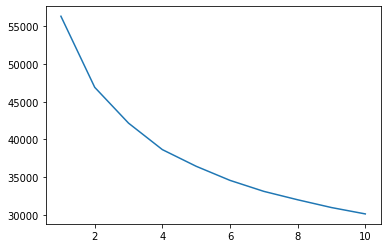

In [423]:
plt.plot(range(1,11), wss)

In [344]:
## optimal cluster is 4, based on the perceived Elbow

In [459]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
labels = k_means.labels_

In [462]:
# data_clust.drop("Cluster_kmeans_4",axis=1,inplace=True)

In [463]:
data_clust["Cluster_kmeans_4"] = labels
data_clust.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Cluster_kmeans_4
0,1,4.0,6.0,3.0,3,2,9.0,1,11.0,1.0,...,0,0,0,0,1,0,0,0,1,1
1,1,1.0,8.0,3.0,4,3,7.0,1,15.0,0.0,...,0,1,1,0,0,1,0,0,1,1
2,1,1.0,30.0,2.0,4,3,6.0,1,14.0,0.0,...,0,0,1,0,0,1,0,0,1,1
3,1,0.0,15.0,2.0,4,5,8.0,0,23.0,0.0,...,0,0,1,0,1,0,0,0,1,1
4,1,0.0,12.0,3.0,3,5,3.0,0,11.0,1.0,...,0,0,1,0,0,1,0,0,1,1


In [464]:
data_clust.Cluster_kmeans_4.value_counts(normalize=True)

1    0.355773
3    0.327709
0    0.172647
2    0.143872
Name: Cluster_kmeans_4, dtype: float64

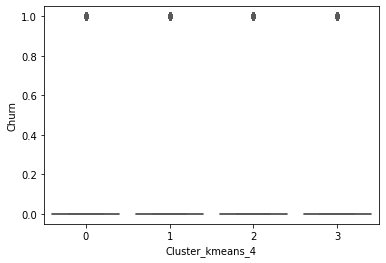

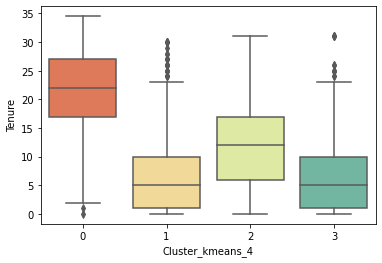

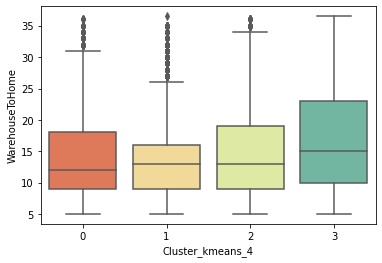

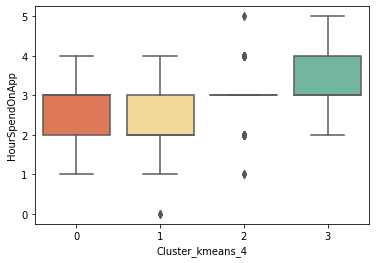

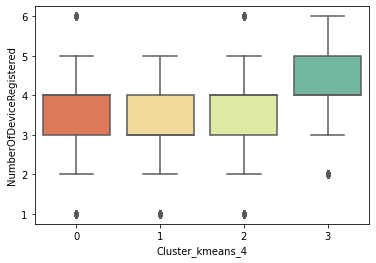

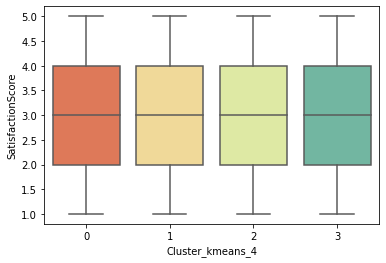

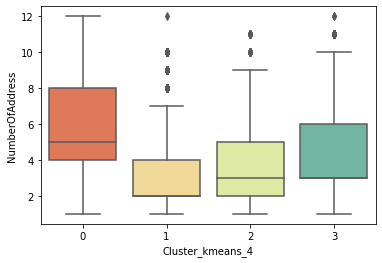

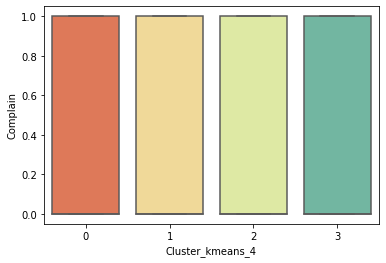

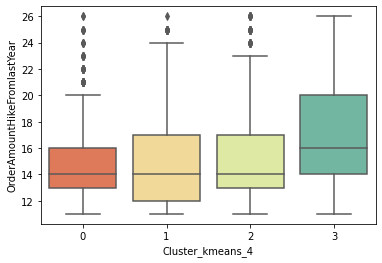

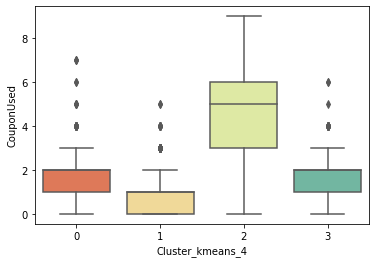

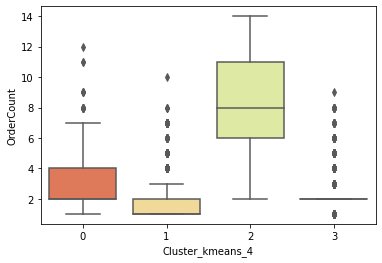

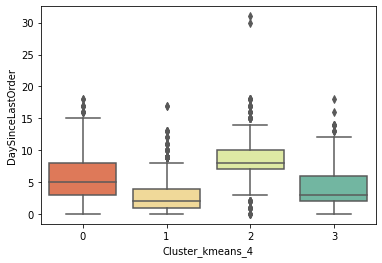

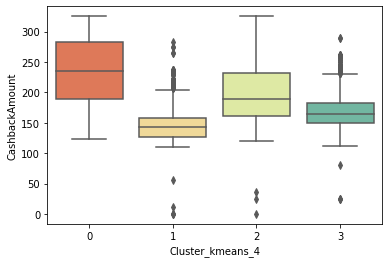

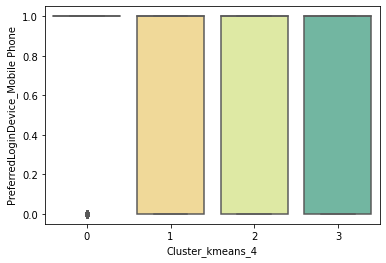

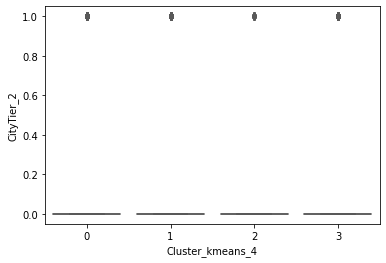

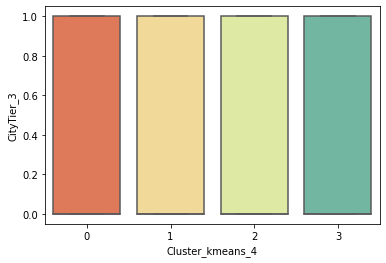

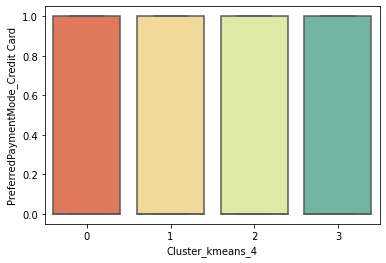

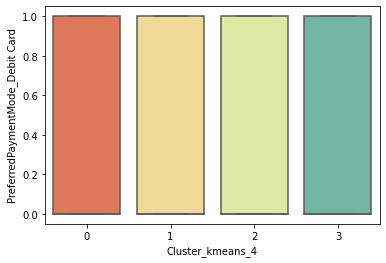

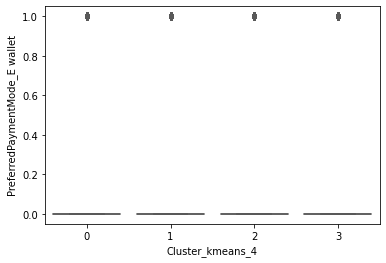

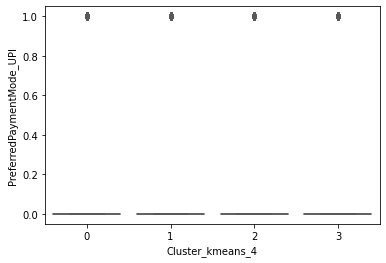

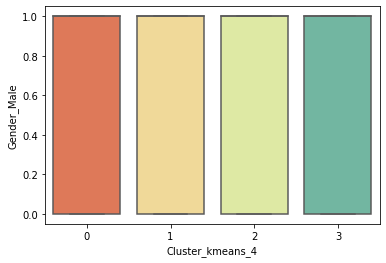

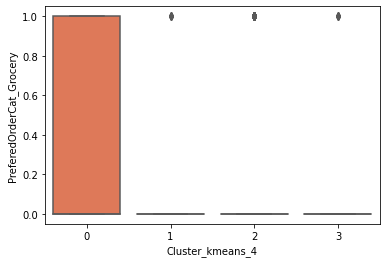

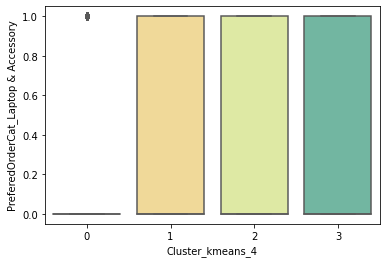

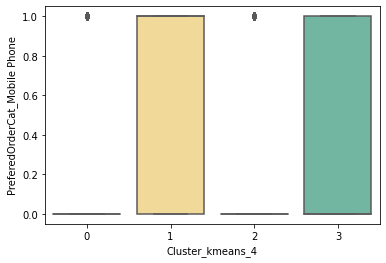

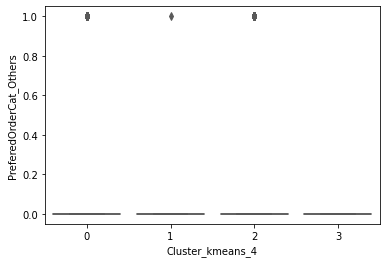

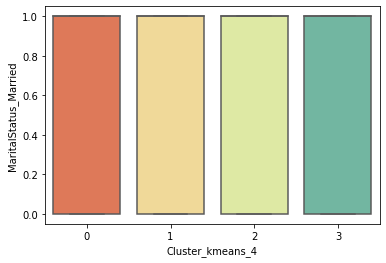

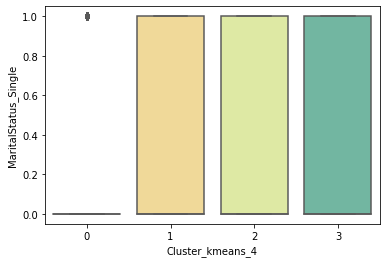

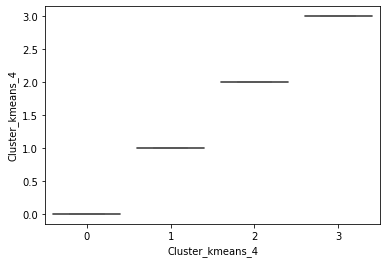

In [465]:
for column in data_clust:
    sns.boxplot(x=data_clust['Cluster_kmeans_4'],y=data_clust[column], palette='Spectral')
    plt.show()

In [466]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [467]:
silhouette_score(scaled_df,labels)

0.12811614246585748

In [468]:
silhouette_samples(scaled_df,labels).min()

-0.1323045953516652

In [469]:
## checking for k = 2 (2 clusters)

In [470]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
labels_2 = k_means.labels_

In [471]:
data_clust["Cluster_kmeans_2"] = labels_2
data_clust.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,Cluster_kmeans_4,Cluster_kmeans_2
0,1,4.0,6.0,3.0,3,2,9.0,1,11.0,1.0,...,0,0,0,1,0,0,0,1,1,0
1,1,1.0,8.0,3.0,4,3,7.0,1,15.0,0.0,...,1,1,0,0,1,0,0,1,1,0
2,1,1.0,30.0,2.0,4,3,6.0,1,14.0,0.0,...,0,1,0,0,1,0,0,1,1,0
3,1,0.0,15.0,2.0,4,5,8.0,0,23.0,0.0,...,0,1,0,1,0,0,0,1,1,0
4,1,0.0,12.0,3.0,3,5,3.0,0,11.0,1.0,...,0,1,0,0,1,0,0,1,1,0


In [472]:
data_clust.Cluster_kmeans_2.value_counts(normalize=True)

0    0.713854
1    0.286146
Name: Cluster_kmeans_2, dtype: float64

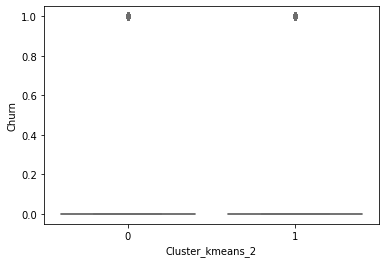

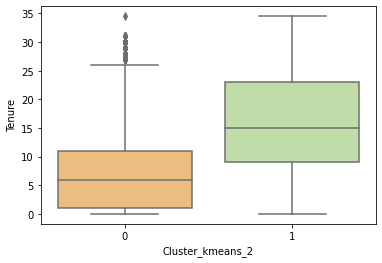

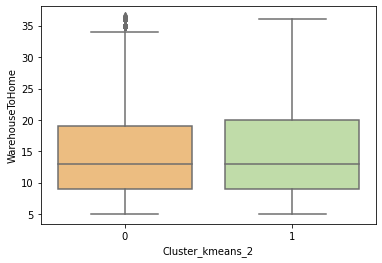

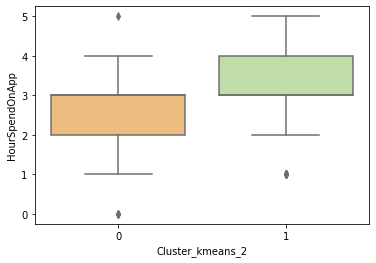

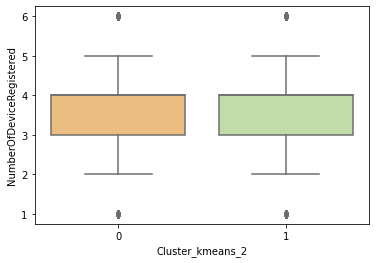

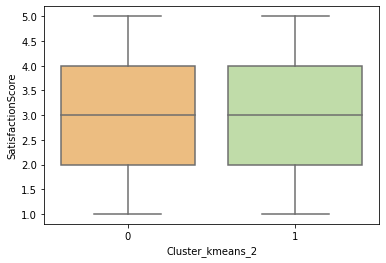

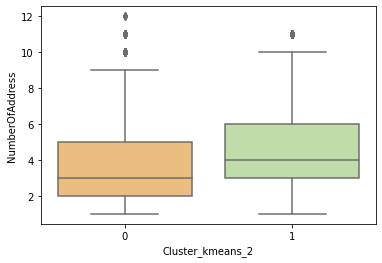

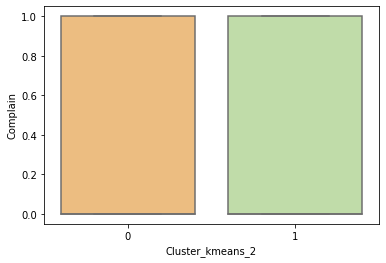

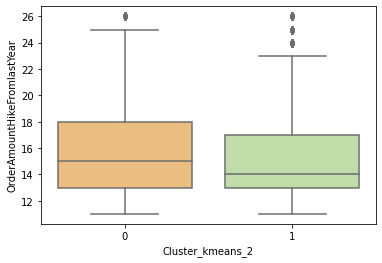

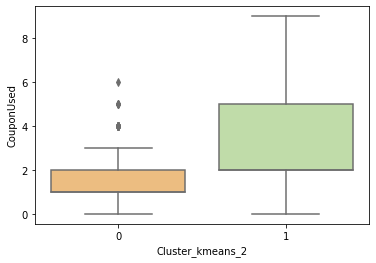

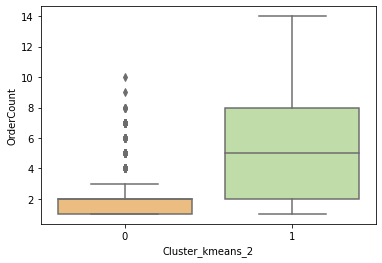

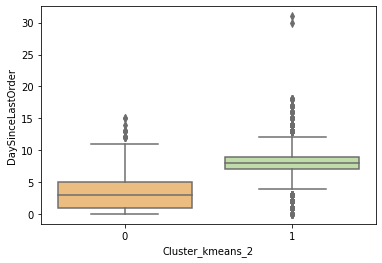

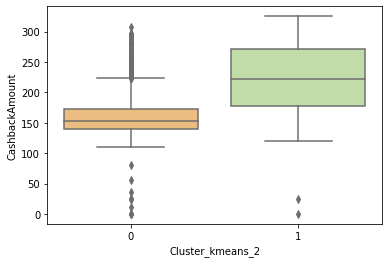

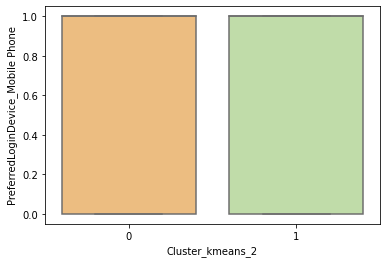

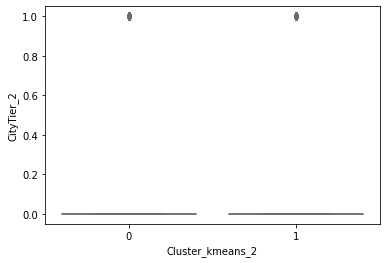

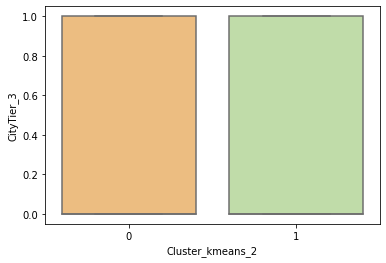

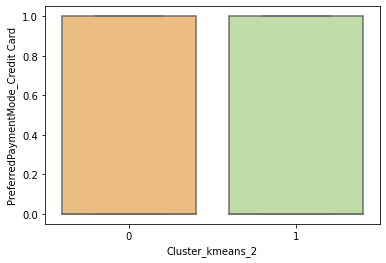

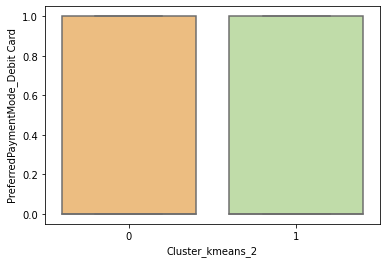

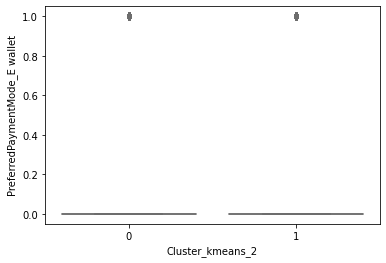

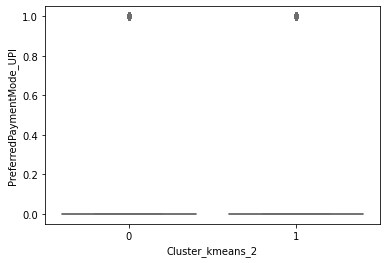

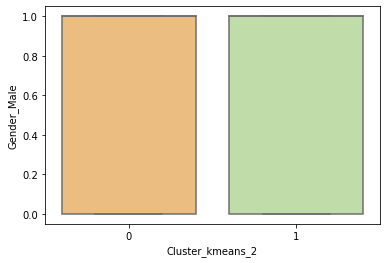

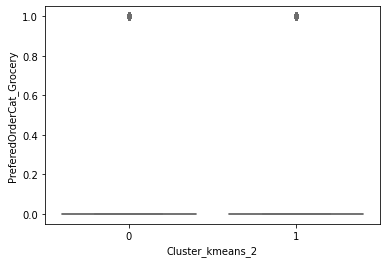

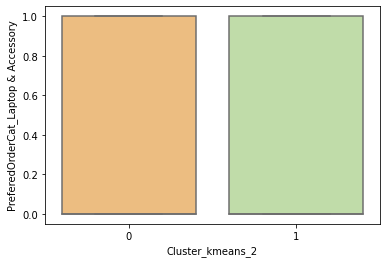

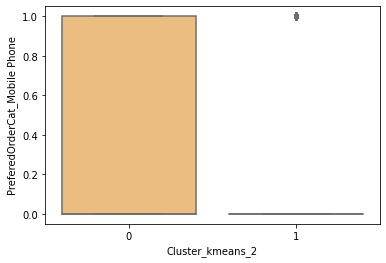

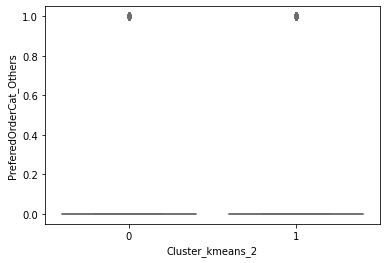

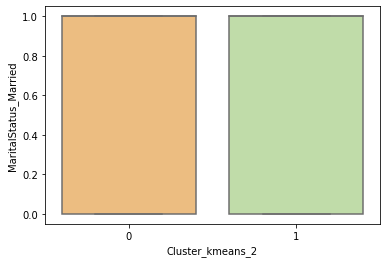

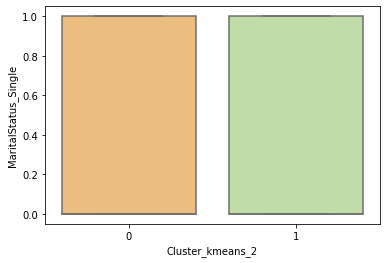

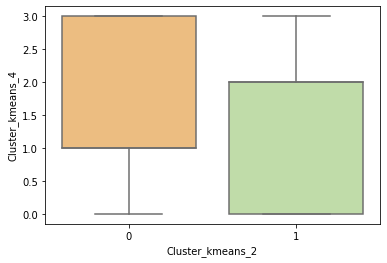

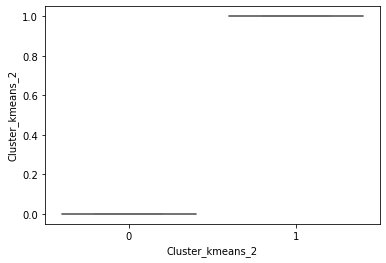

In [473]:
for column in data_clust:
    sns.boxplot(x=data_clust['Cluster_kmeans_2'],y=data_clust[column], palette='Spectral')
    plt.show()

In [474]:
silhouette_score(scaled_df,labels_2)

0.2162541334413553

In [475]:
silhouette_samples(scaled_df,labels_2).min()

-0.12588685109963663

In [476]:
## PCA - for visualising the clusters, we reduce dimensions of the dataset to 2

In [477]:
# Using scikit learn PCA here. 
from sklearn.decomposition import PCA

In [478]:
# NOTE - we are generating only 2 PCA dimensions

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(scaled_df)
data_reduced.shape

(5630, 2)

In [479]:
df_red = pd.DataFrame(data=data_reduced, columns=['PC1','PC2'])

In [480]:
df_red

,PC1,PC2
0,-0.770456,-0.209968
1,-2.008494,0.957730
2,-1.921749,0.202659
3,-1.761306,0.859167
4,-1.716021,-0.461998
...,...,...
5625,-0.796534,-0.048911
5626,0.768572,0.730925
5627,-1.026666,-0.400649
5628,1.396032,0.955590


In [481]:
pca.explained_variance_ratio_

array([0.25321583, 0.13538655])

In [482]:
# pca.components:
pca.components_

array([[ 0.32711635,  0.02273231,  0.18718456,  0.16666652,  0.12924917,
         0.00680055,  0.45947609,  0.4885235 ,  0.41193374,  0.43982707],
       [-0.16326718,  0.17745585,  0.60672212,  0.57355203,  0.26862162,
         0.31093181, -0.00260172, -0.14775625, -0.22067774, -0.07352604]])

In [483]:
# df_red.drop("Cluster_kmeans_4", axis=1,inplace=True)

In [484]:
df_red["Cluster_kmeans_4"] = labels

In [485]:
df_red

,PC1,PC2,Cluster_kmeans_4
0,-0.770456,-0.209968,1
1,-2.008494,0.957730,1
2,-1.921749,0.202659,1
3,-1.761306,0.859167,1
4,-1.716021,-0.461998,1
...,...,...,...
5625,-0.796534,-0.048911,1
5626,0.768572,0.730925,0
5627,-1.026666,-0.400649,1
5628,1.396032,0.955590,0


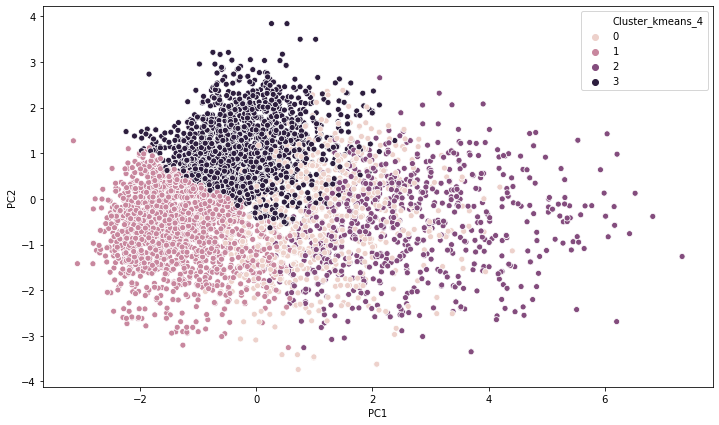

In [486]:
plt.figure(figsize=(12,7))
sns.scatterplot(df_red.PC1,df_red.PC2, hue=df_red['Cluster_kmeans_4'])

#### EPILOGUE: this section is to be used if we wish to use the dataset with the clusters for modeling

In [487]:
data_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5630 non-null   int64  
 1   Tenure                               5630 non-null   float64
 2   WarehouseToHome                      5630 non-null   float64
 3   HourSpendOnApp                       5630 non-null   float64
 4   NumberOfDeviceRegistered             5630 non-null   int64  
 5   SatisfactionScore                    5630 non-null   int64  
 6   NumberOfAddress                      5630 non-null   float64
 7   Complain                             5630 non-null   int64  
 8   OrderAmountHikeFromlastYear          5630 non-null   float64
 9   CouponUsed                           5630 non-null   float64
 10  OrderCount                           5630 non-null   float64
 11  DaySinceLastOrder             

In [489]:
data_clust4 = data_clust.copy()

In [490]:
data_clust4.drop('Cluster_kmeans_2', axis=1, inplace=True)

In [492]:
data_clust4['Cluster_kmeans_4'] = data_clust4.Cluster_kmeans_4.astype('object')

In [493]:
data_clust4 = pd.get_dummies(data_clust4, drop_first=True)

In [494]:
data_clust4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                5630 non-null   int64  
 1   Tenure                               5630 non-null   float64
 2   WarehouseToHome                      5630 non-null   float64
 3   HourSpendOnApp                       5630 non-null   float64
 4   NumberOfDeviceRegistered             5630 non-null   int64  
 5   SatisfactionScore                    5630 non-null   int64  
 6   NumberOfAddress                      5630 non-null   float64
 7   Complain                             5630 non-null   int64  
 8   OrderAmountHikeFromlastYear          5630 non-null   float64
 9   CouponUsed                           5630 non-null   float64
 10  OrderCount                           5630 non-null   float64
 11  DaySinceLastOrder             